In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import re
%matplotlib inline
plt.style.use('ggplot') # 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
if 'google.colab' in str(get_ipython()):
    print('Running on CoLab')
    df = pd.read_excel('/content/drive/My Drive/빅데이터_콘테스트/base_line.xlsx', header=0)
else:
    print('Not running on CoLab')
    df = pd.read_excel('base_line_hyeryeon_bomi.xlsx', header=0, sheet_name='original_data')

Not running on CoLab


# 프라임 시간대

In [7]:
df['168'] = (df['DAY_NUM']-1)*24 + df['HOUR']

Text(0.5, 1.0, '요일별 시간대별 취급액(평균)')

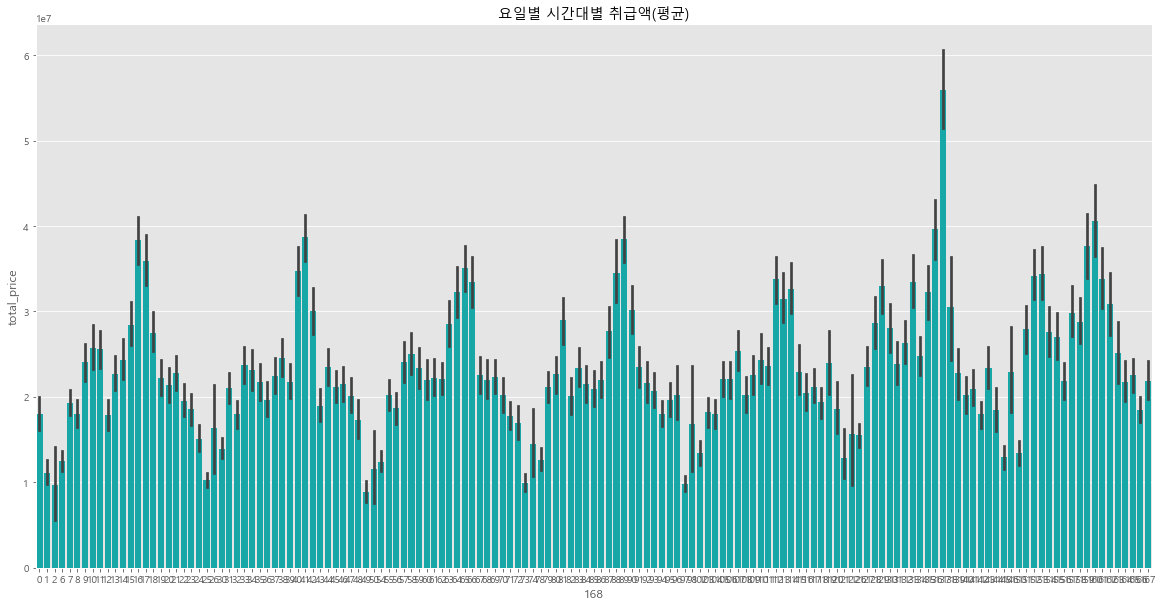

In [13]:
f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x=df['168'], y=df['total_price'], data=df, color = "c")
plt.title("요일별 시간대별 취급액(평균)")

Text(0.5, 1.0, '요일별 시간대별 판매량(평균)')

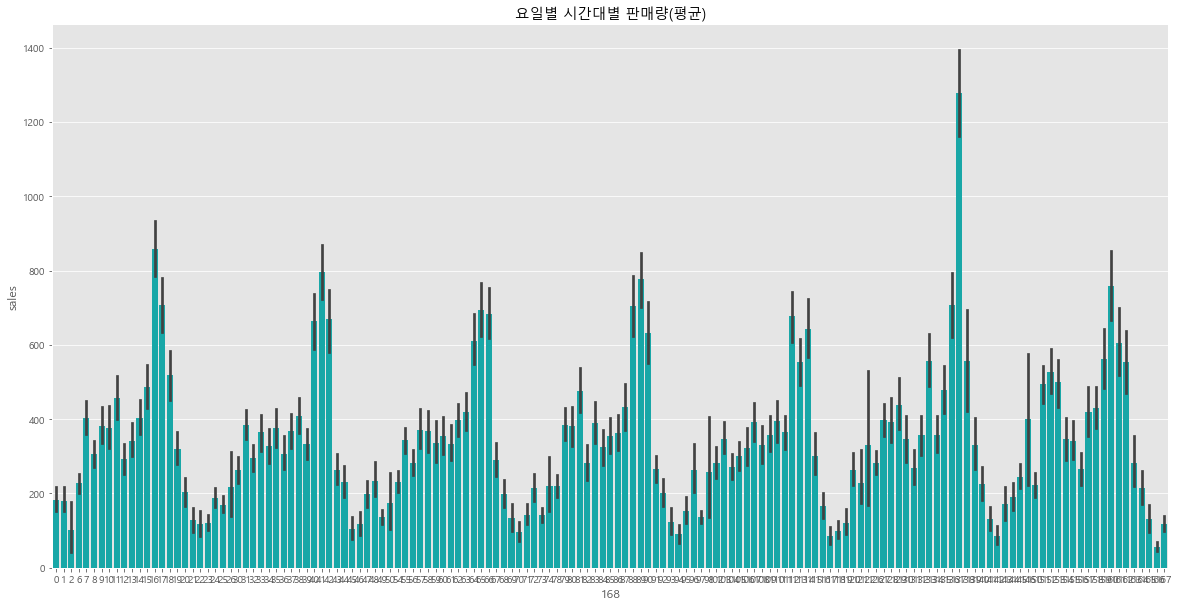

In [5]:
f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x=df['168'], y=df['sales'], data=df, color = "c")
plt.title("요일별 시간대별 판매량(평균)")

In [34]:
prime = df.groupby('168').sum()

Text(0.5, 1.0, '요일별 시간대별 취급액(합계)')

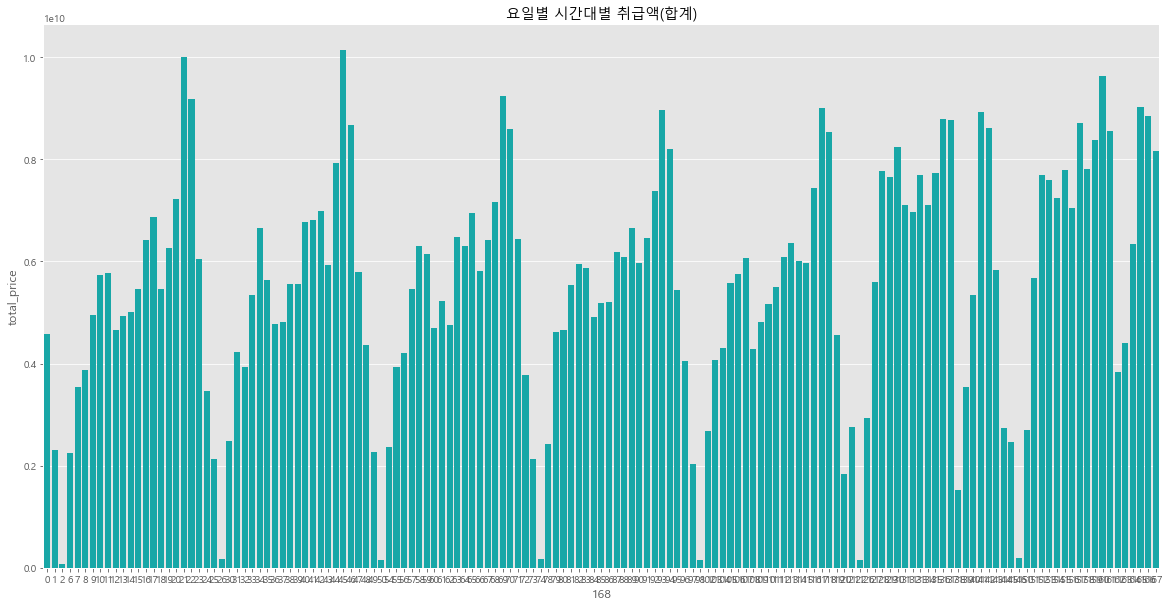

In [11]:
f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x=prime.index, y=prime['total_price'], data=prime, color = "c")
plt.title("요일별 시간대별 취급액(합계)")

Text(0.5, 1.0, '요일별 시간대별 판매량(합계)')

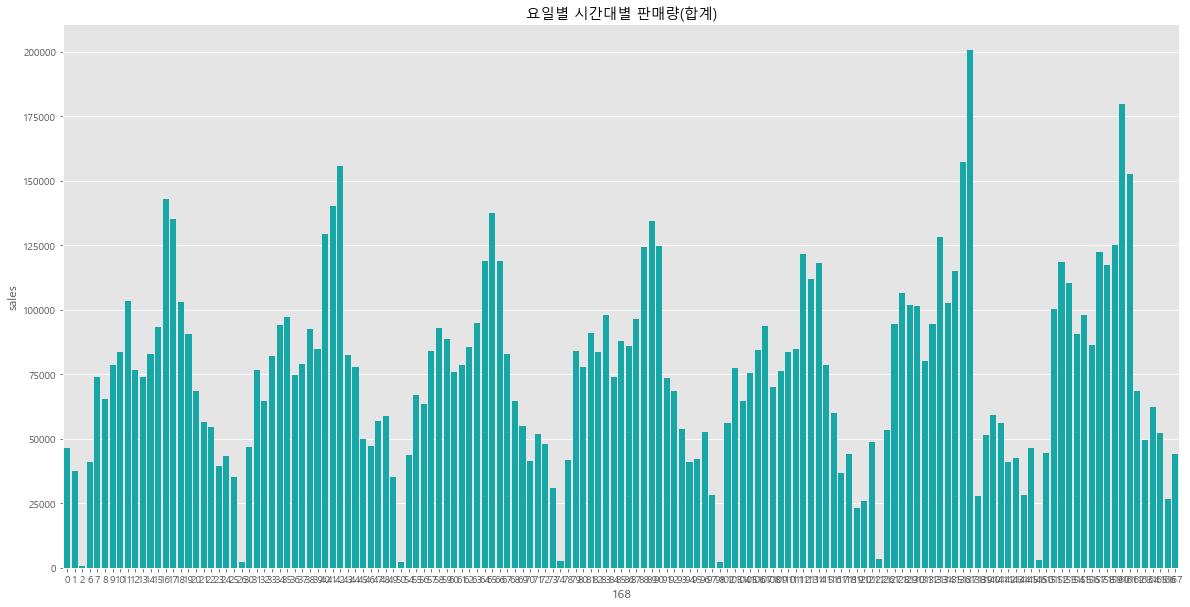

In [12]:
f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x=prime.index, y=prime['sales'], data=prime, color = "c")
plt.title("요일별 시간대별 판매량(합계)")

In [10]:
# 밤에는 주로 단가가 높은 상품을 편성한다.(잡화, 가구, 가전)

In [18]:
data = df

In [128]:
건강기능 =data[data['p_group'] == '건강기능']
생활용품 =data[data['p_group'] == '생활용품']
침구 =data[data['p_group'] == '침구']
주방 =data[data['p_group'] == '주방']
가전 =data[data['p_group'] == '가전']
가구 =data[data['p_group'] == '가구']
이미용 =data[data['p_group'] == '이미용']
농수축 =data[data['p_group'] == '농수축']
잡화 =data[data['p_group'] == '잡화']
속옷= data[data['p_group'] == '속옷']
의류=data[data['p_group'] == '의류']

In [129]:
# 카테고리별

In [130]:
p_group_name = ['의류', '속옷', '농수축', '이미용', '가전', '가구', '침구', '생활용품', '잡화', '건강기능', '주방']

In [142]:
def prime_sum_sales(group):
    split_data = data[data['p_group'] == group]
    grouped = split_data.groupby('168').sum()
    
    x_axis = np.arange(0, 168)
    temp = pd.DataFrame(x_axis)
    merge_grouped = pd.merge(temp, grouped, how='left', left_index=True, right_index=True).fillna(0)
    
    f, ax = plt.subplots(figsize=(20, 10))
    sns.barplot(x=merge_grouped.index, y=merge_grouped['sales'], data=grouped, color = "m")
    plt.title("%s 요일별 시간대별 판매량(합계)" % group)

In [131]:
def prime_sum(group):
    split_data = data[data['p_group'] == group]
    grouped = split_data.groupby('168').sum()
    
    x_axis = np.arange(0, 168)
    temp = pd.DataFrame(x_axis)
    merge_grouped = pd.merge(temp, grouped, how='left', left_index=True, right_index=True).fillna(0)
    
    f, ax = plt.subplots(figsize=(20, 10))
    sns.barplot(x=merge_grouped.index, y=merge_grouped['total_price'], data=grouped, color = "c")
    plt.title("%s 요일별 시간대별 취급액(합계)" % group)

In [152]:
# def prime_mean(group):
#     split_data = data[data['p_group'] == group]
    
#     f, ax = plt.subplots(figsize=(20, 10))
#     sns.barplot(x=split_data['168'], y=split_data['total_price'], data=grouped, color = "y")
#     plt.title("%s 요일별 시간대별 취급액(평균)" % group)

In [166]:
def prime_mean(group):
    split_data = data[data['p_group'] == group]
    grouped = split_data.groupby('168').mean()
    
    x_axis = np.arange(0, 168)
    temp = pd.DataFrame(x_axis)
    merge_grouped = pd.merge(temp, grouped, how='left', left_index=True, right_index=True).fillna(0)
    
    f, ax = plt.subplots(figsize=(20, 10))
    sns.barplot(x=merge_grouped.index, y=merge_grouped['total_price'], data=grouped, color = "y")
    plt.title("%s 요일별 시간대별 취급액(평균)" % group)

# 합계(취급액)

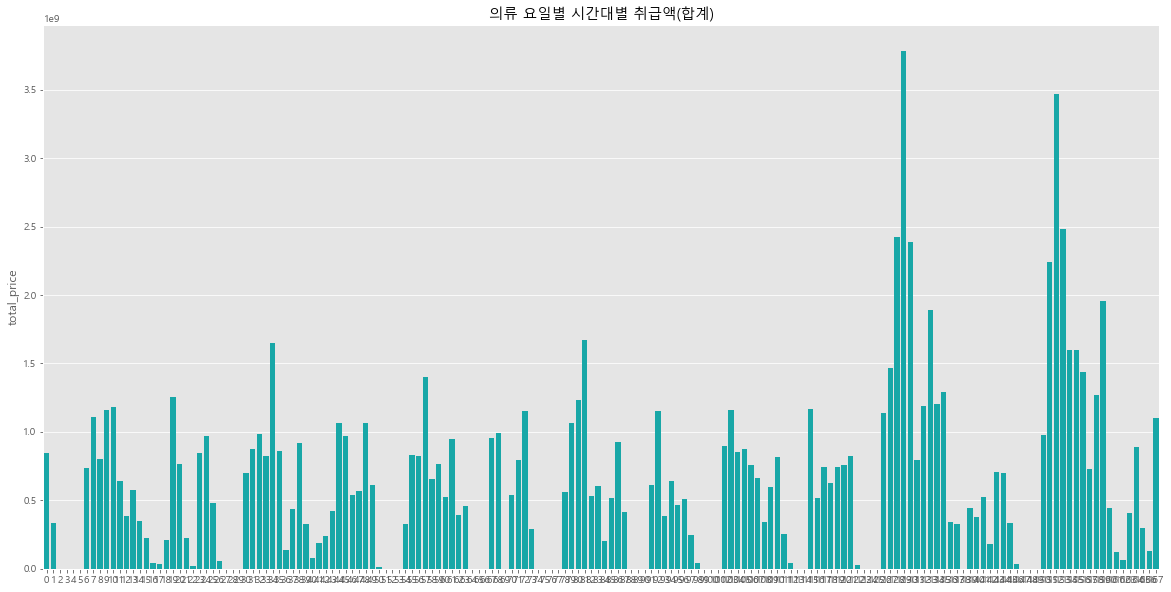

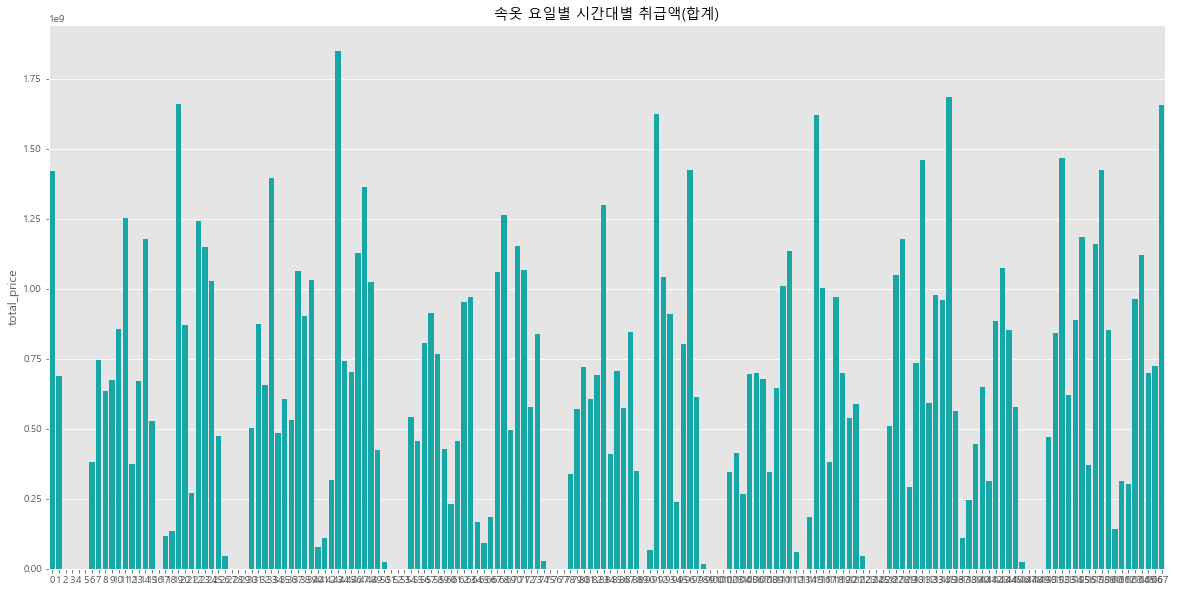

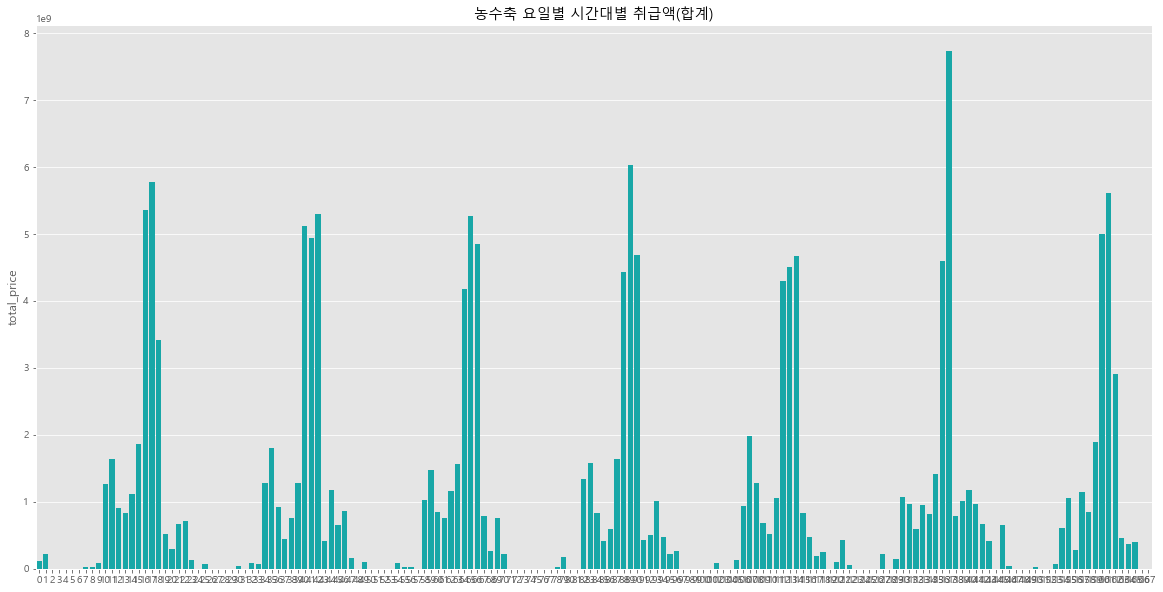

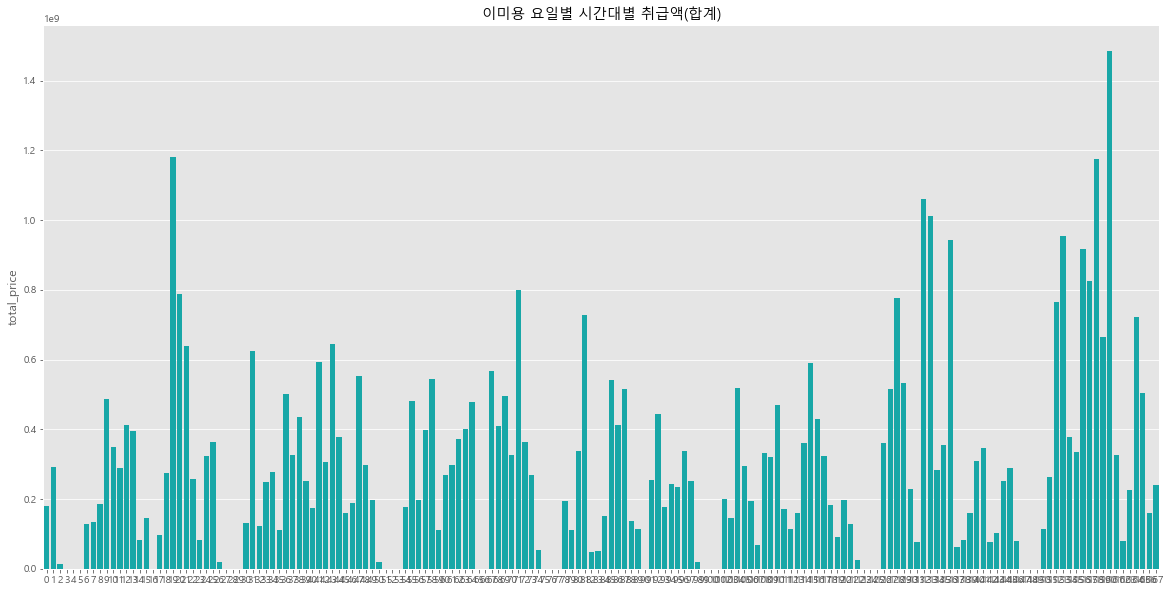

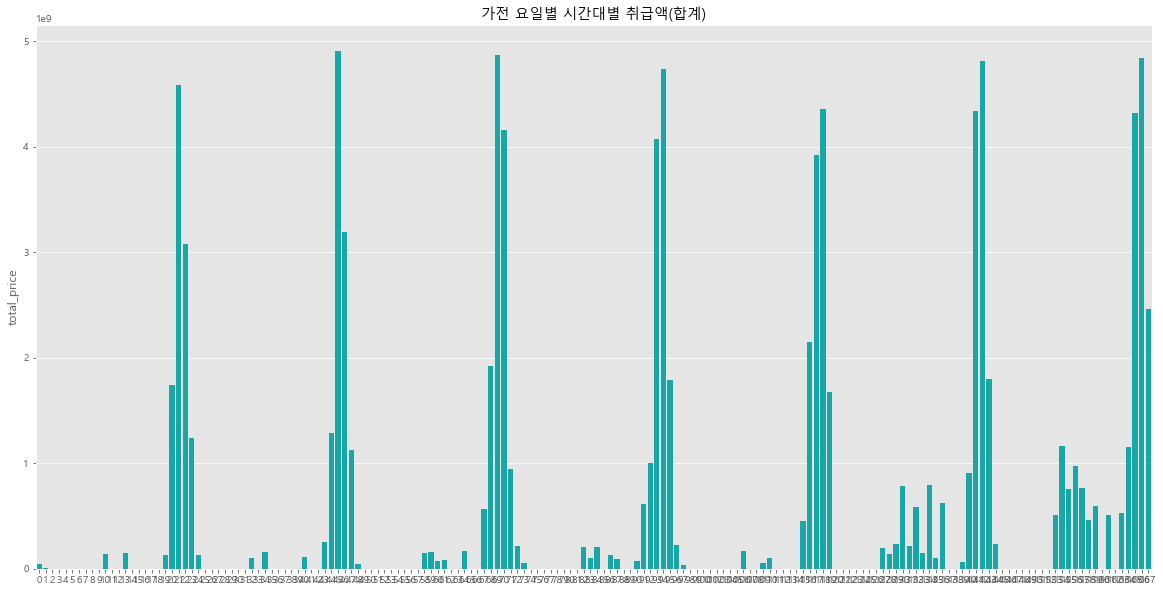

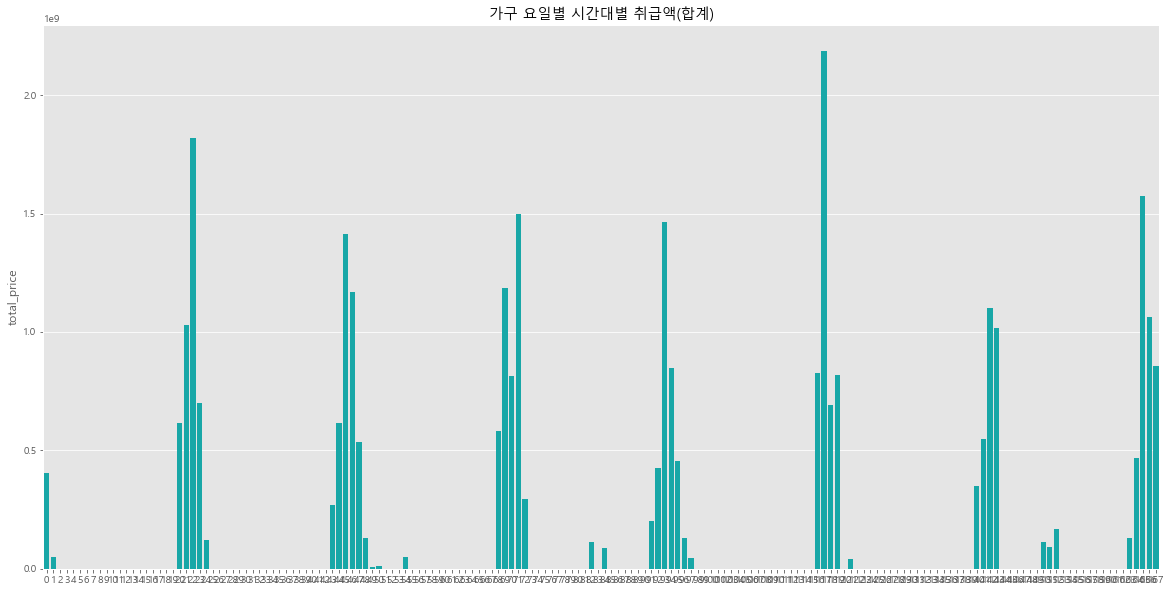

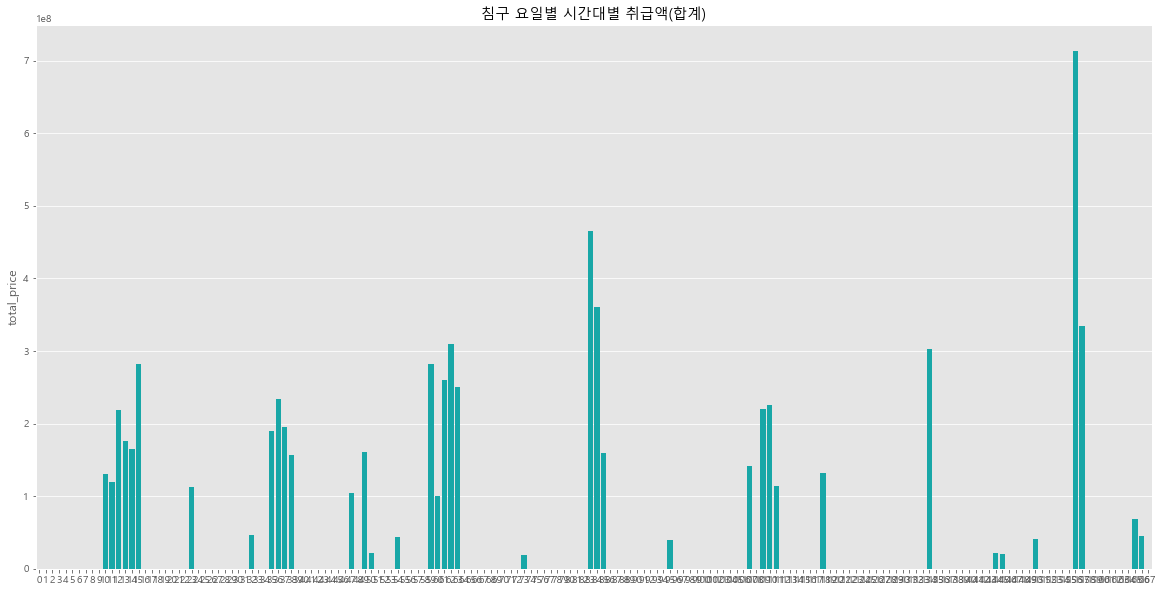

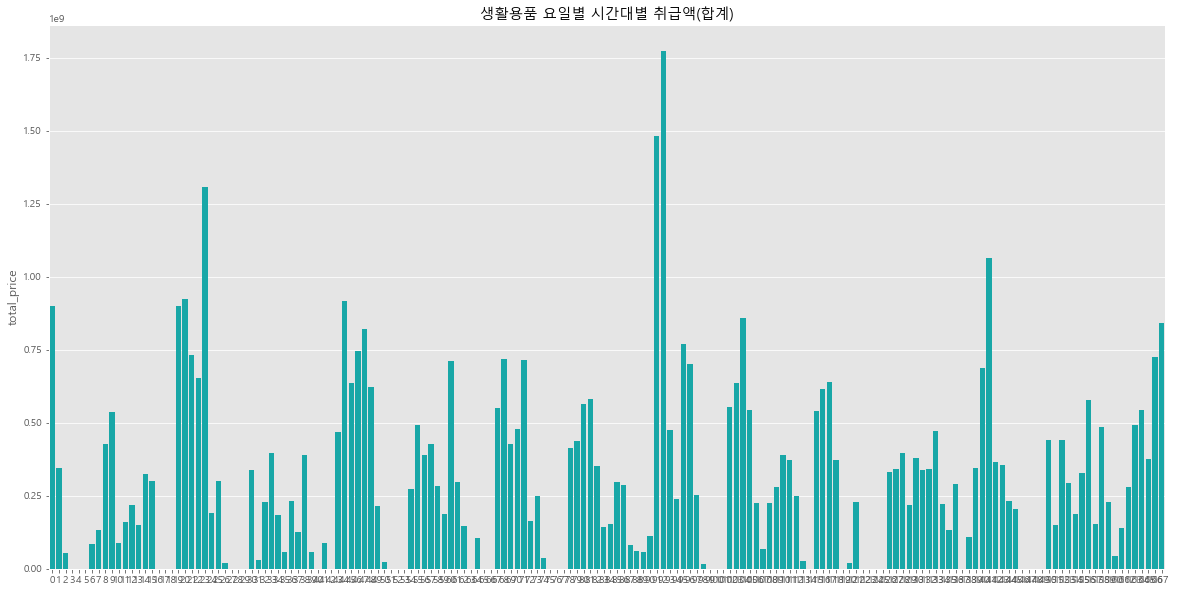

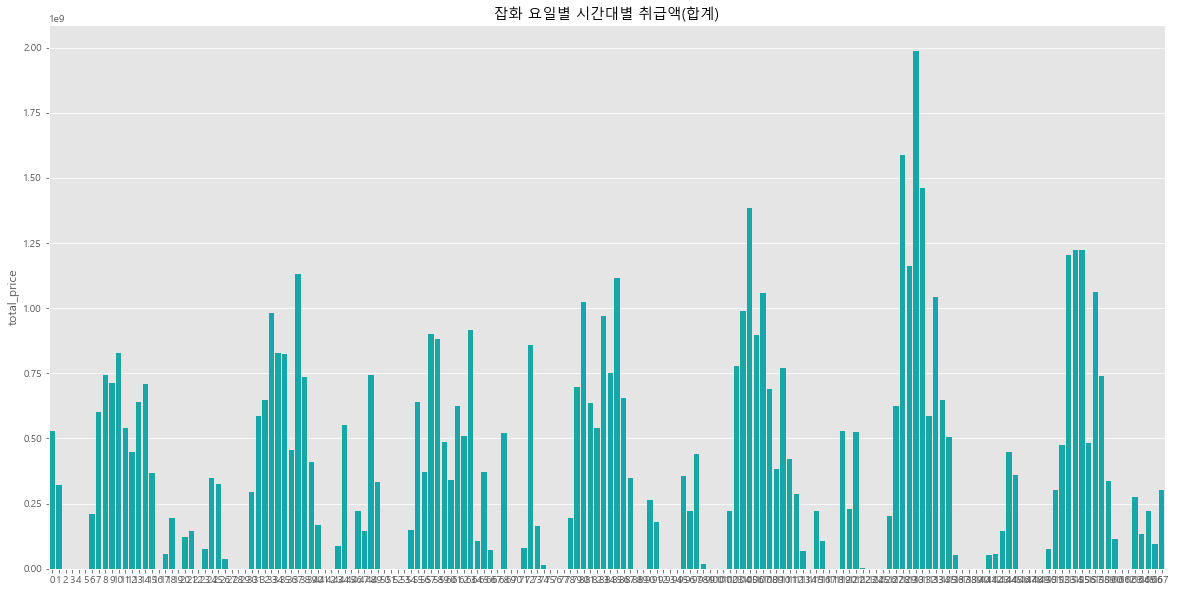

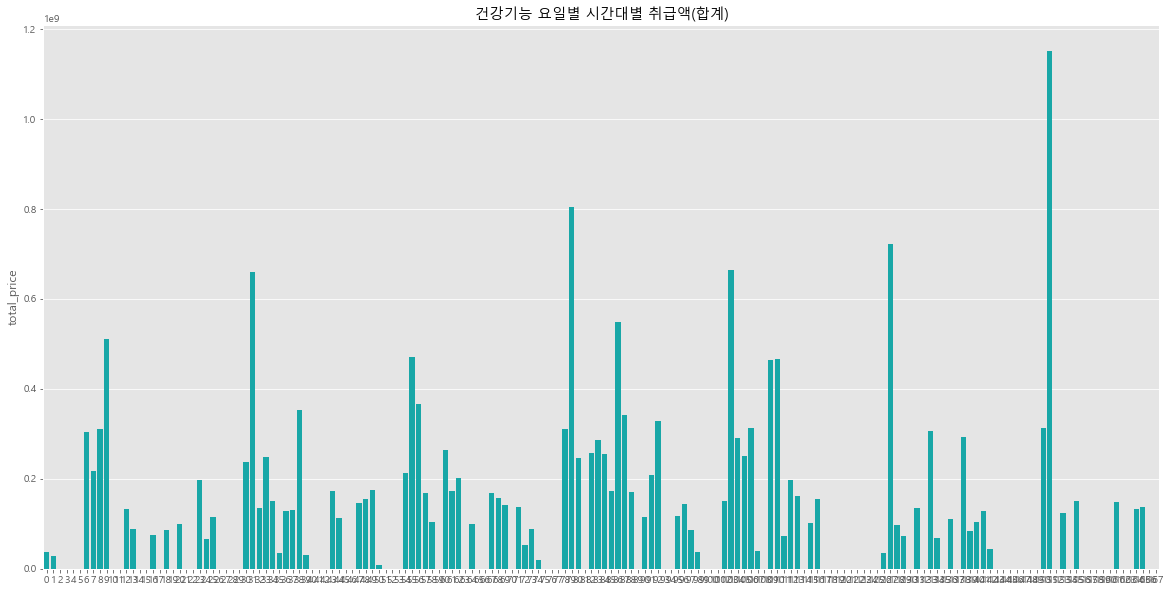

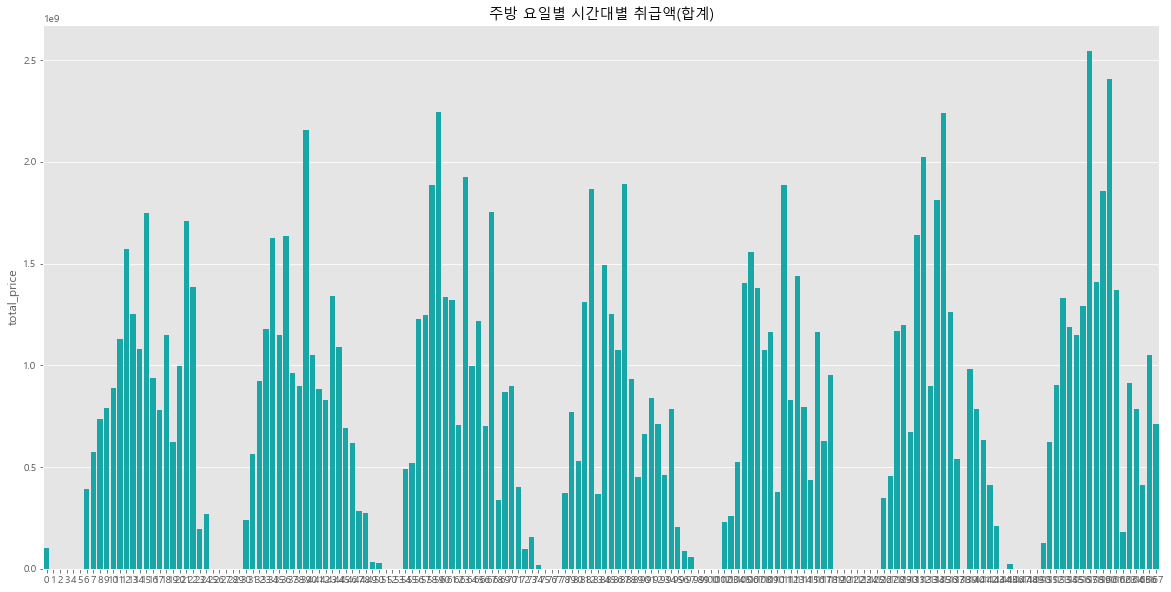

In [107]:
for i in p_group_name:
    prime_sum(i)

# 판매량(합계)

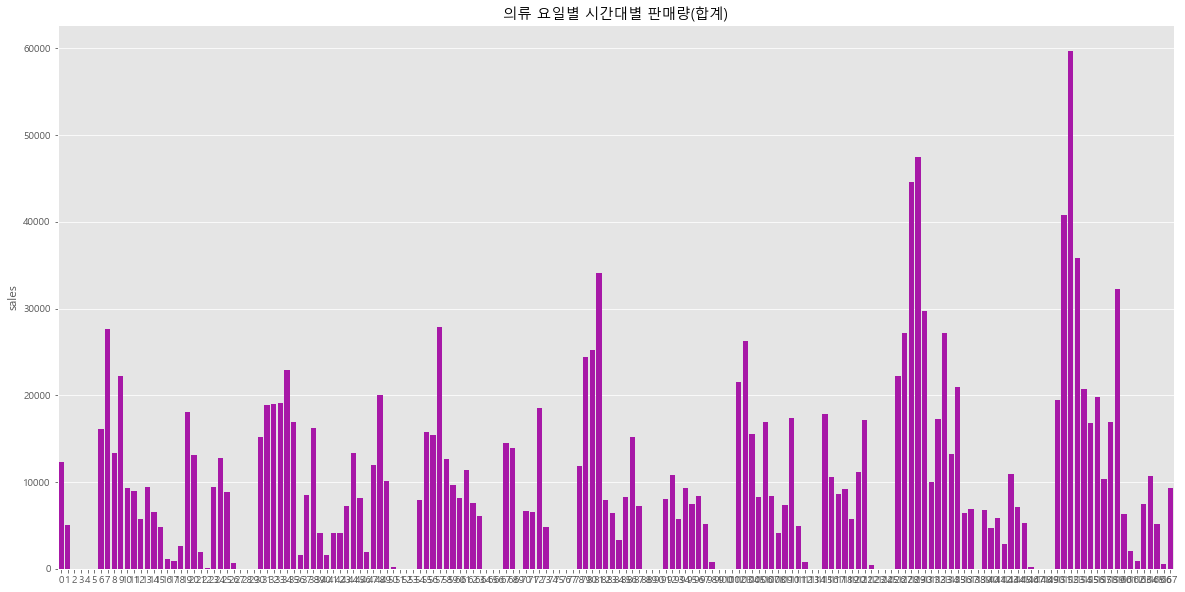

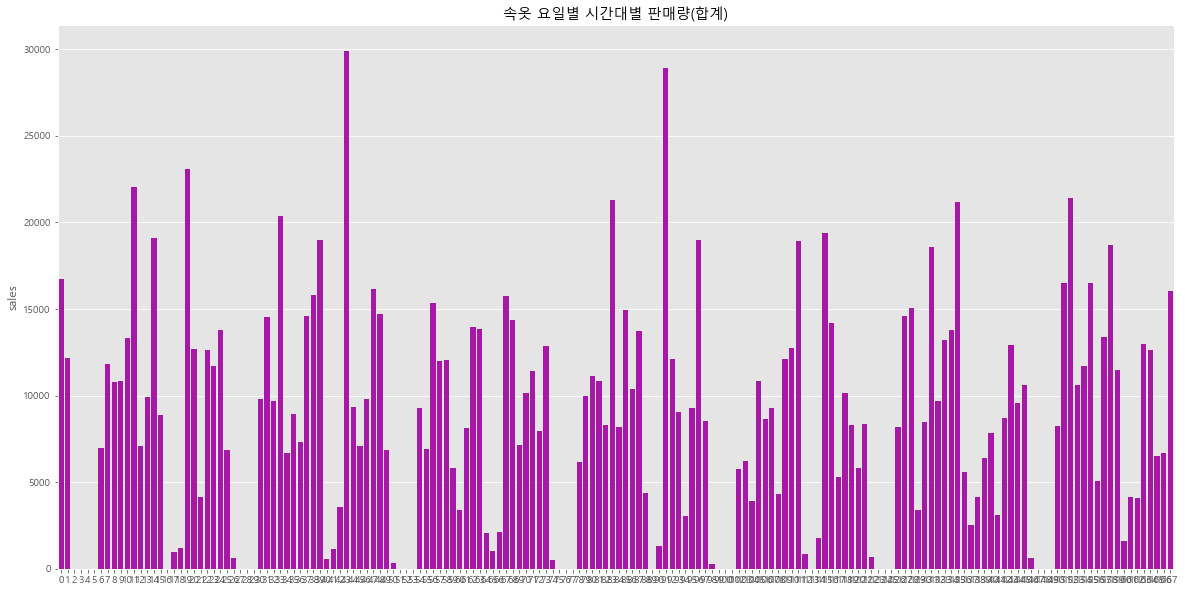

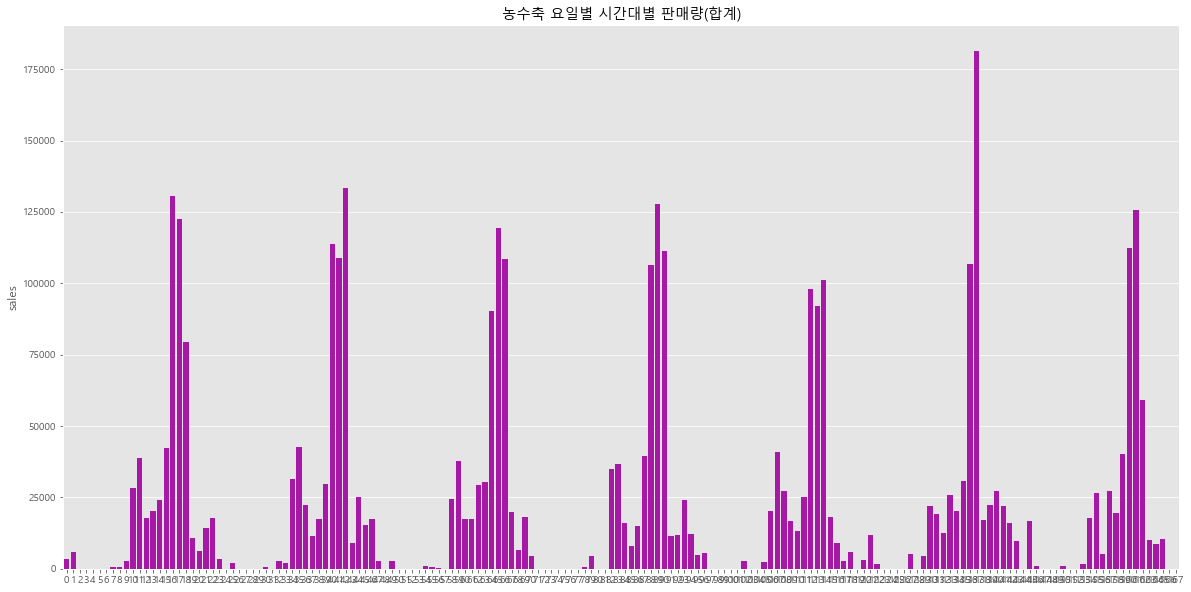

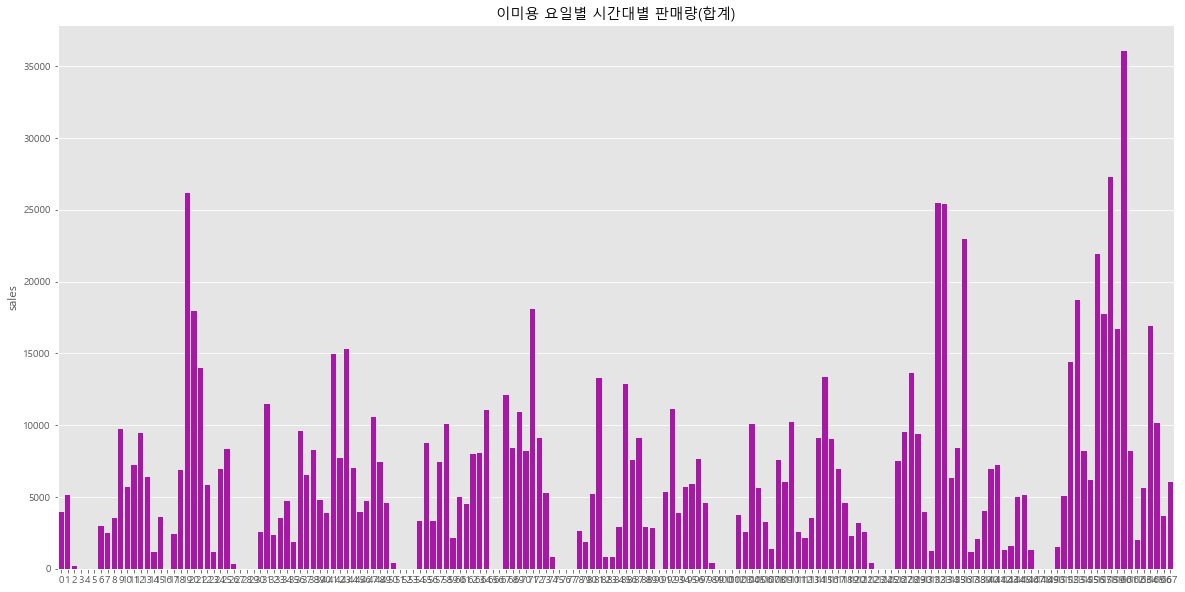

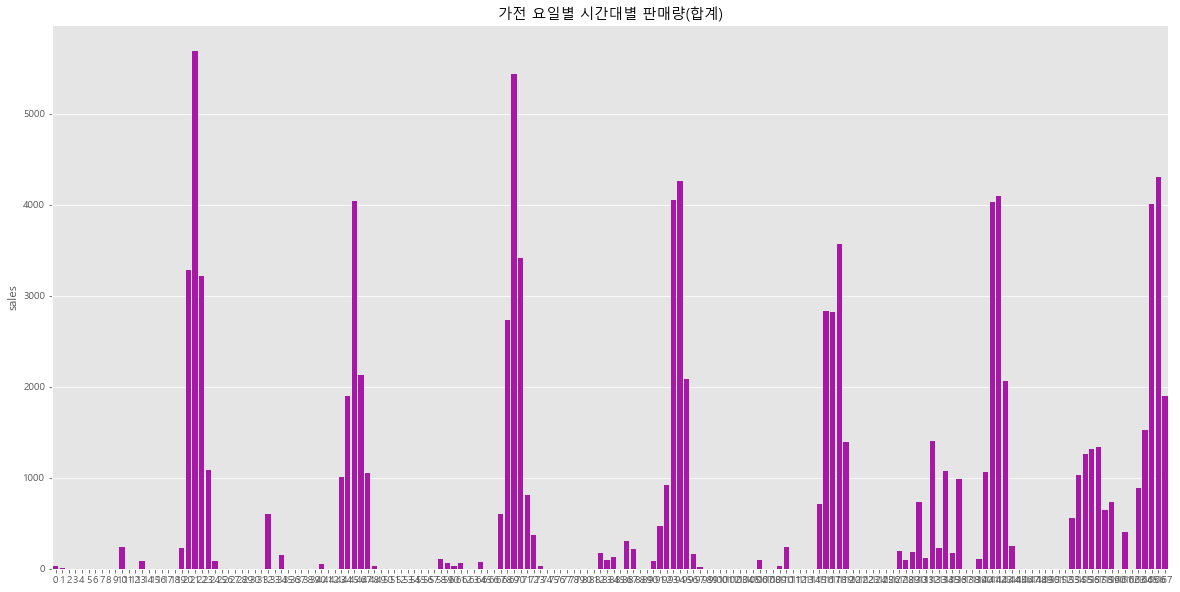

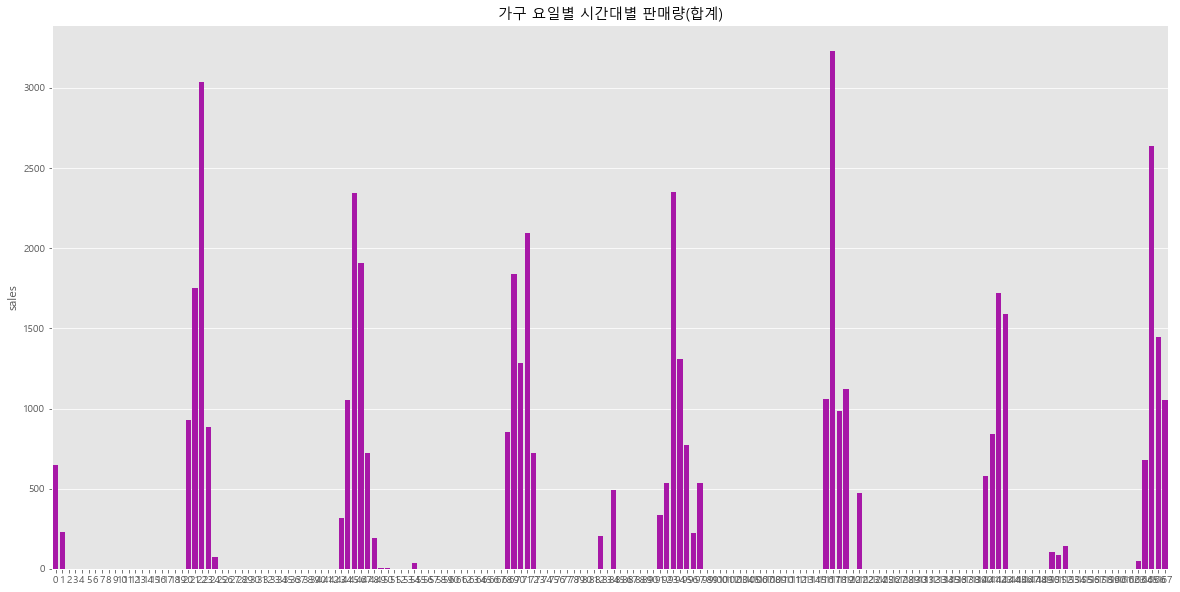

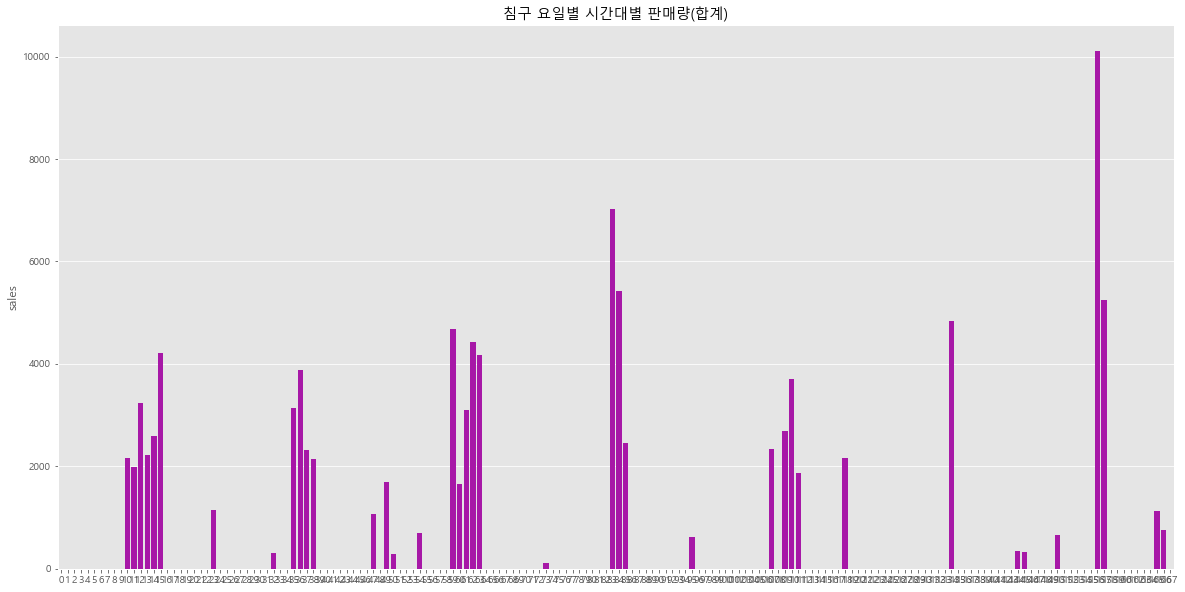

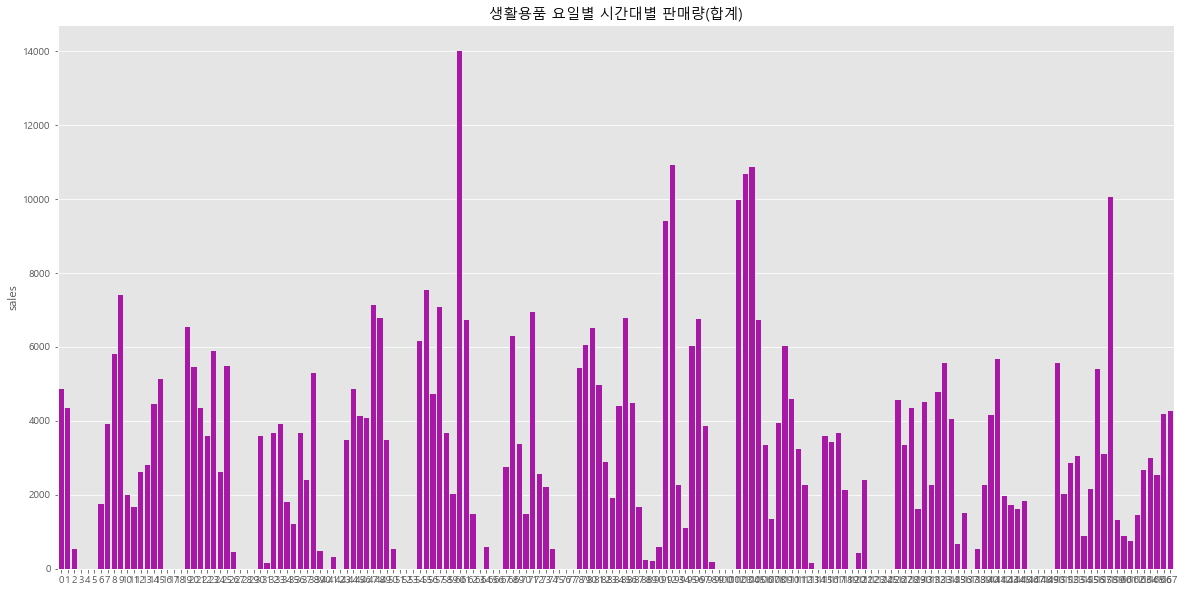

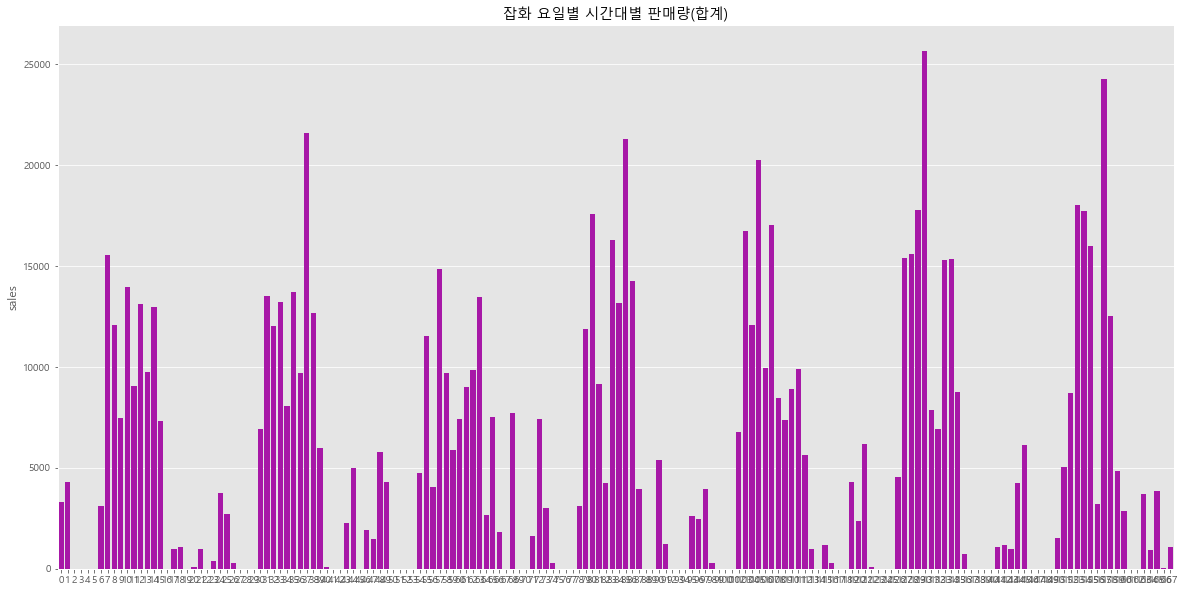

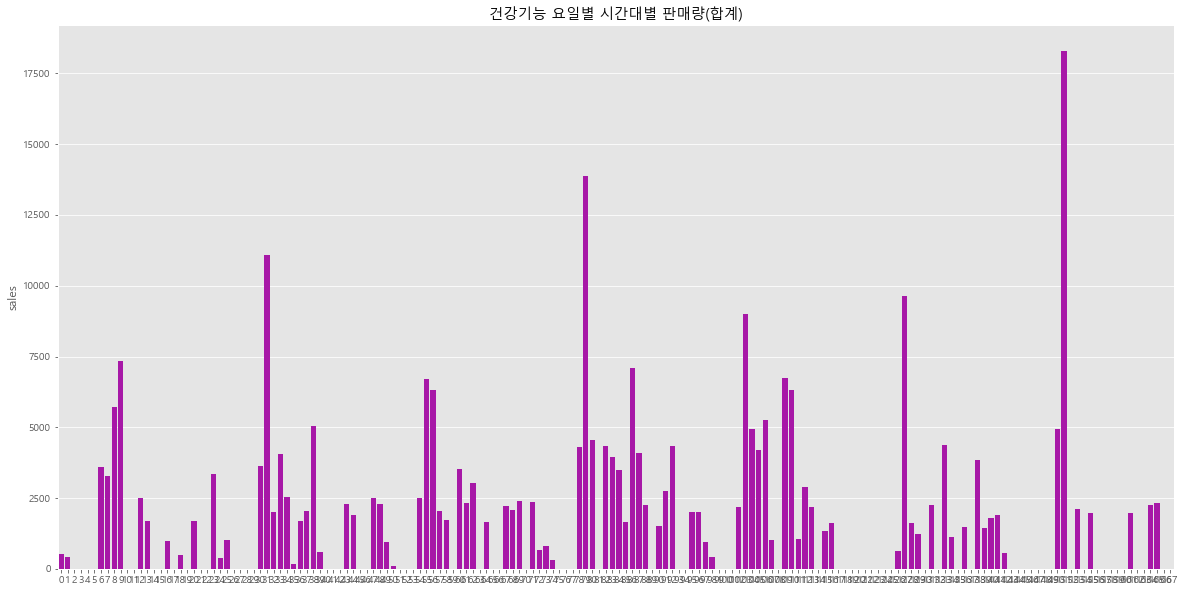

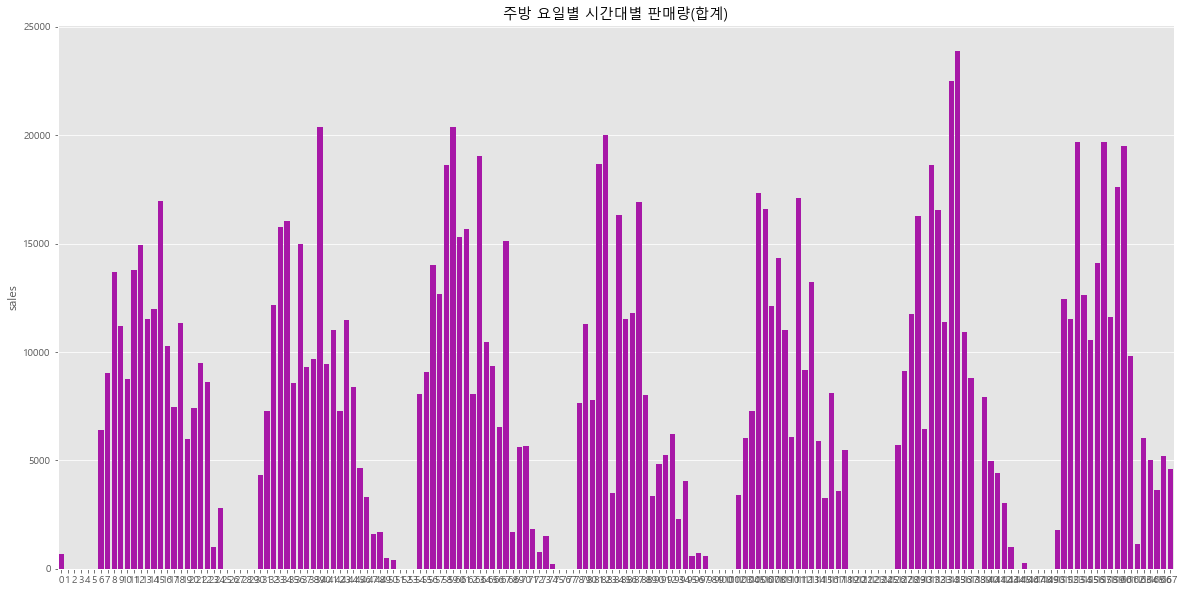

In [143]:
for i in p_group_name:
    prime_sum_sales(i)

# 시간대별

In [160]:
def hour_mean(group):
    split_data = data[data['p_group'] == group]
    grouped = split_data.groupby('HOUR').mean()
    
    x_axis = np.arange(0, 24)
    temp = pd.DataFrame(x_axis)
    merge_grouped = pd.merge(temp, grouped, how='left', left_index=True, right_index=True).fillna(0)
    
    f, ax = plt.subplots(figsize=(20, 10))
    sns.barplot(x=merge_grouped.index, y=merge_grouped['total_price'], data=grouped, color = "y")
    plt.title("%s 시간대별 취급액(평균)" % group)

In [157]:
def hour_sum(group):
    split_data = data[data['p_group'] == group]
    grouped = split_data.groupby('HOUR').sum()
    
    x_axis = np.arange(0, 24)
    temp = pd.DataFrame(x_axis)
    merge_grouped = pd.merge(temp, grouped, how='left', left_index=True, right_index=True).fillna(0)
    
    f, ax = plt.subplots(figsize=(20, 10))
    sns.barplot(x=merge_grouped.index, y=merge_grouped['total_price'], data=grouped, color = "c")
    plt.title("%s 시간대별 취급액(합계)" % group)

In [144]:
def hour_sum_sales(group):
    split_data = data[data['p_group'] == group]
    grouped = split_data.groupby('HOUR').sum()
    
    x_axis = np.arange(0, 24)
    temp = pd.DataFrame(x_axis)
    merge_grouped = pd.merge(temp, grouped, how='left', left_index=True, right_index=True).fillna(0)
    
    f, ax = plt.subplots(figsize=(20, 10))
    sns.barplot(x=merge_grouped.index, y=merge_grouped['sales'], data=grouped, color = "m")
    plt.title("%s 시간대별 판매량(합계)" % group)

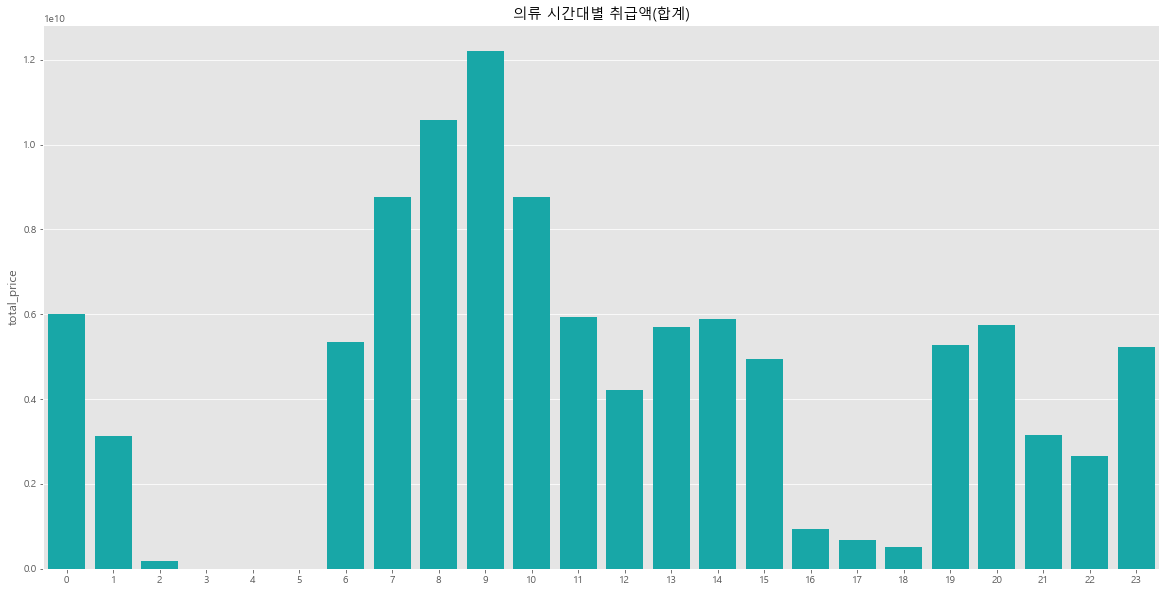

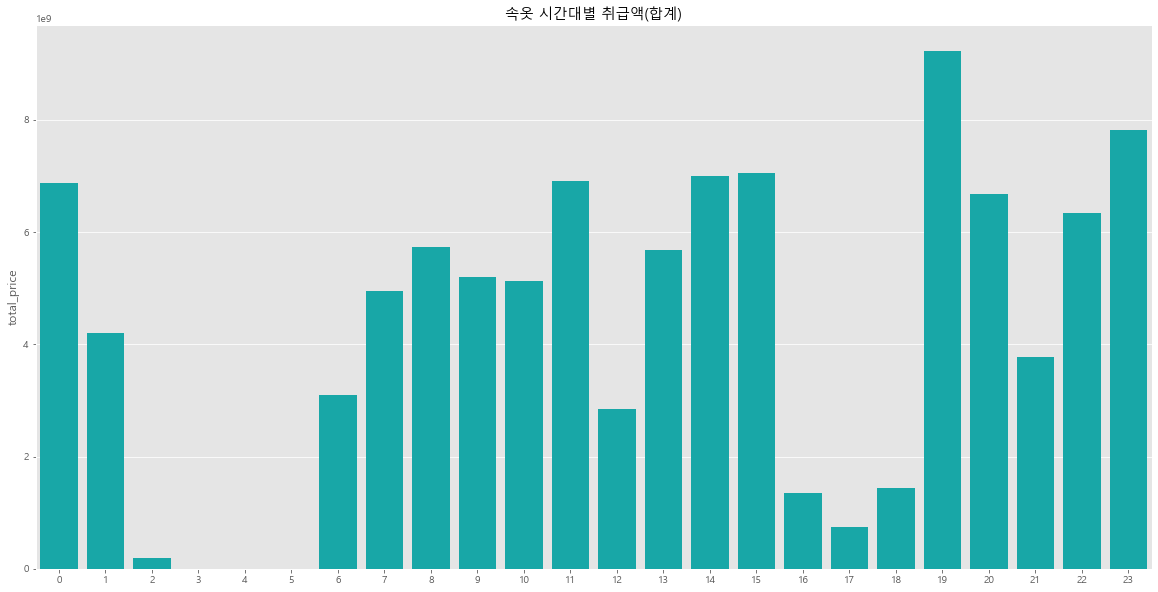

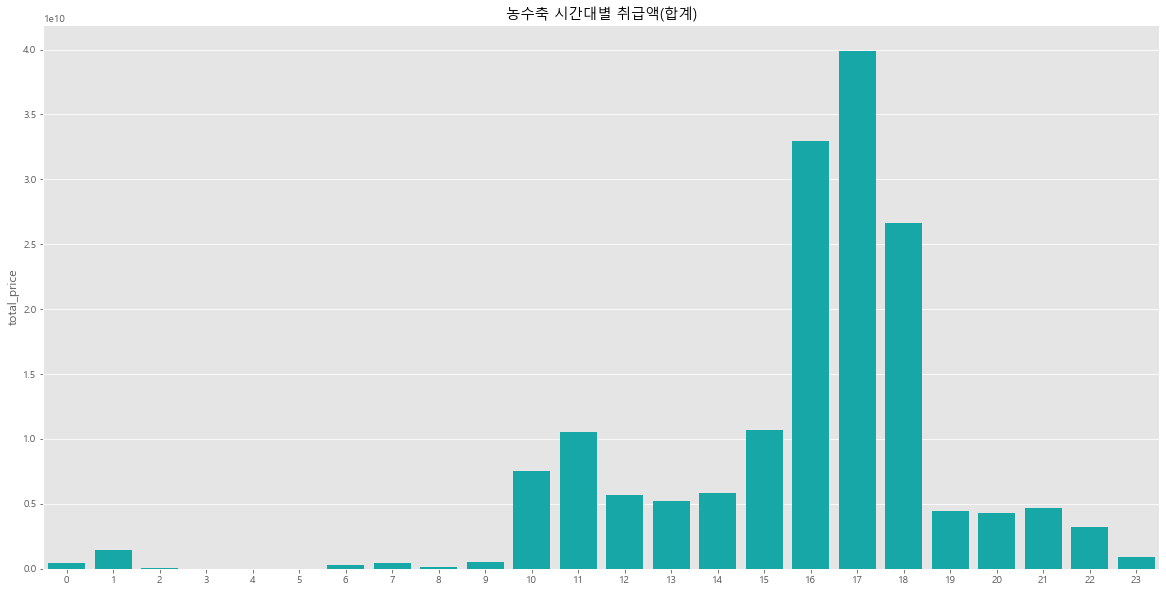

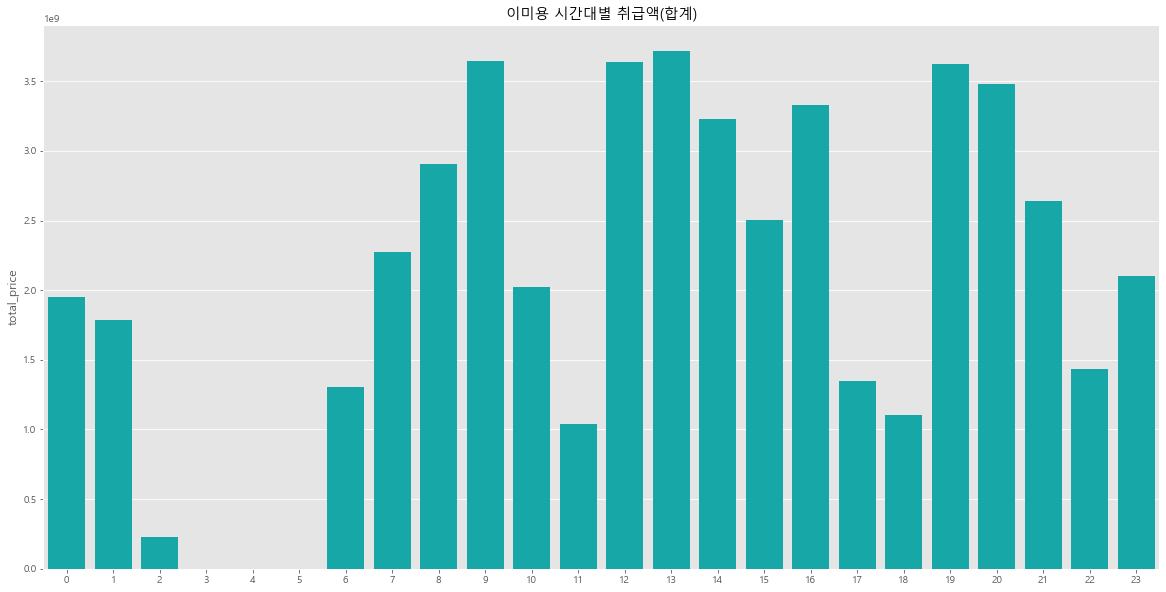

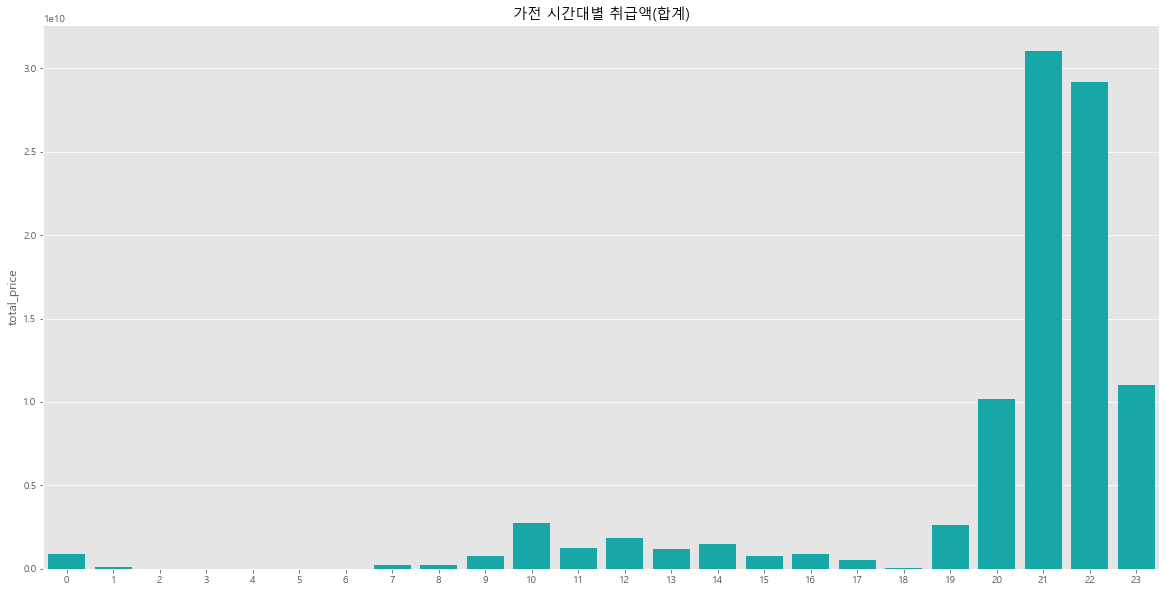

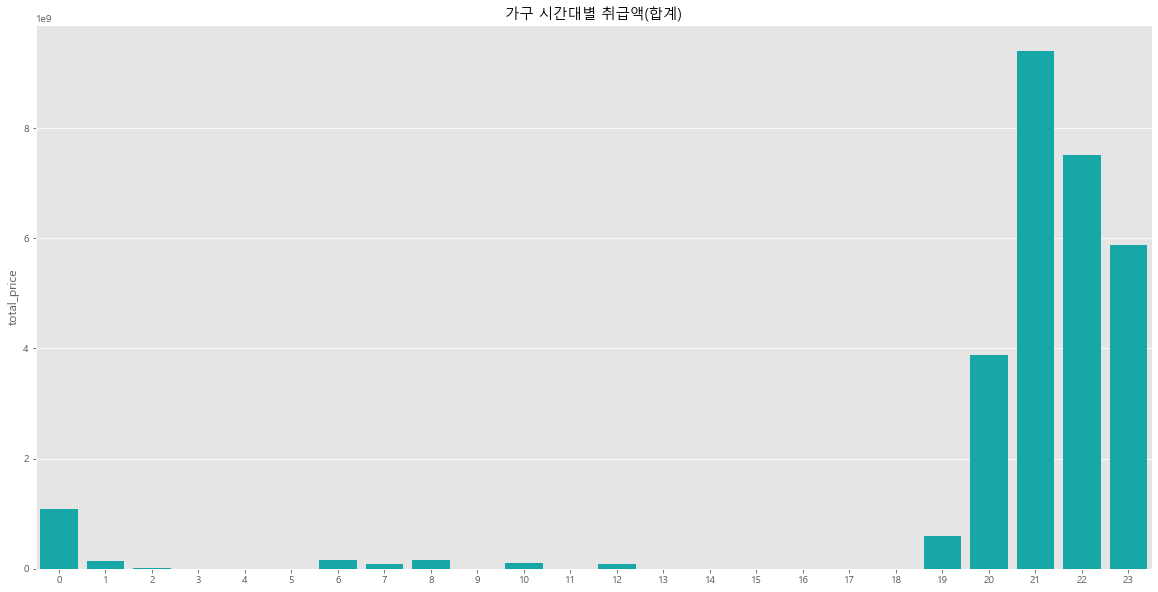

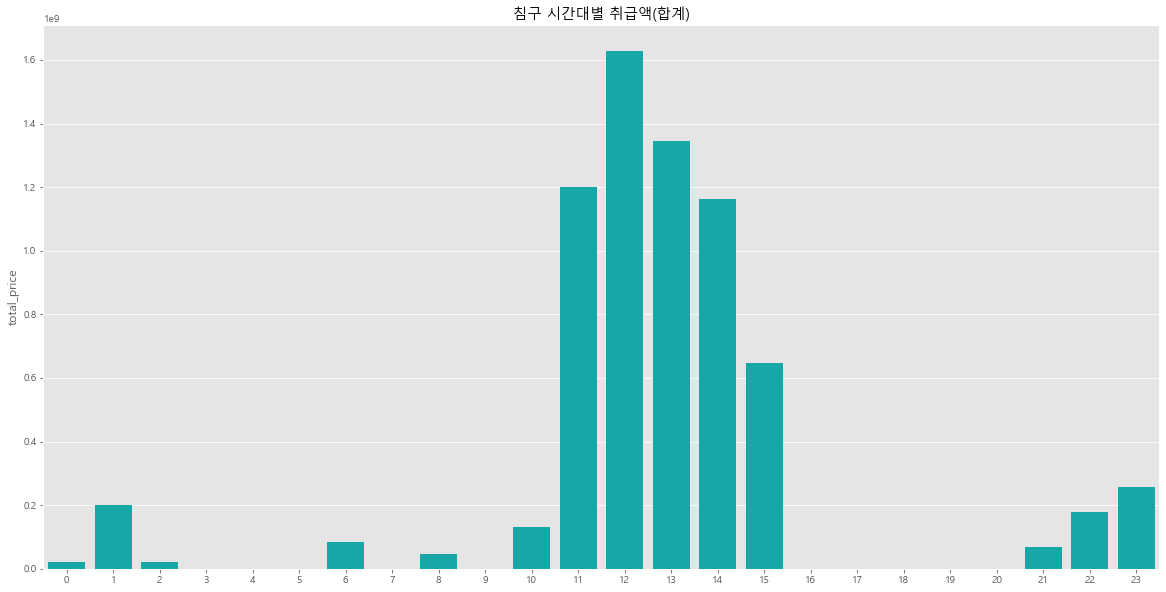

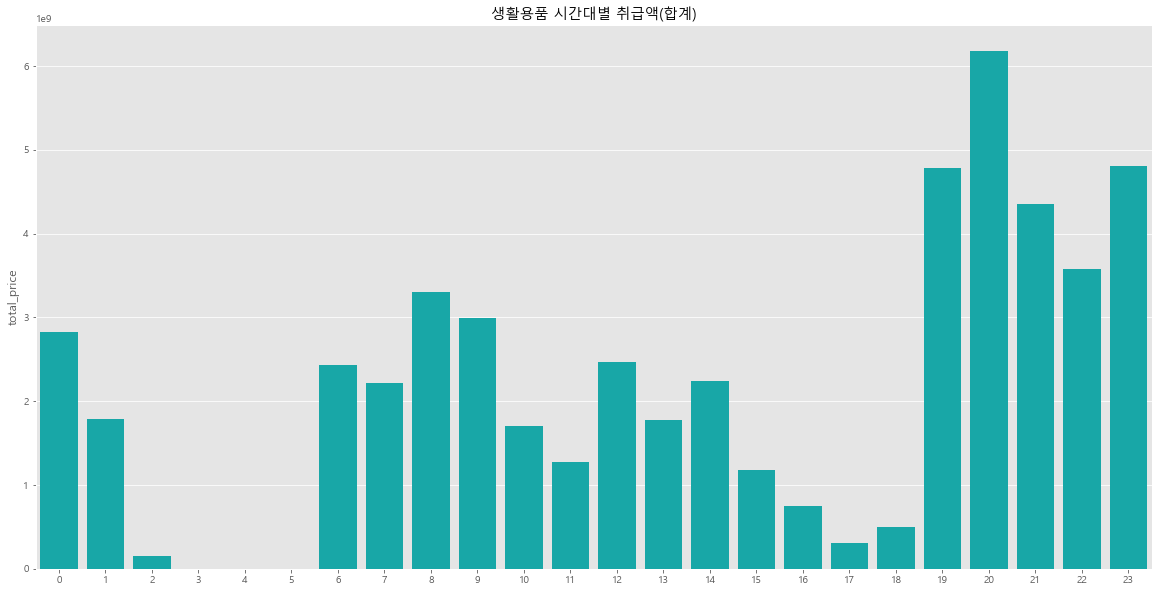

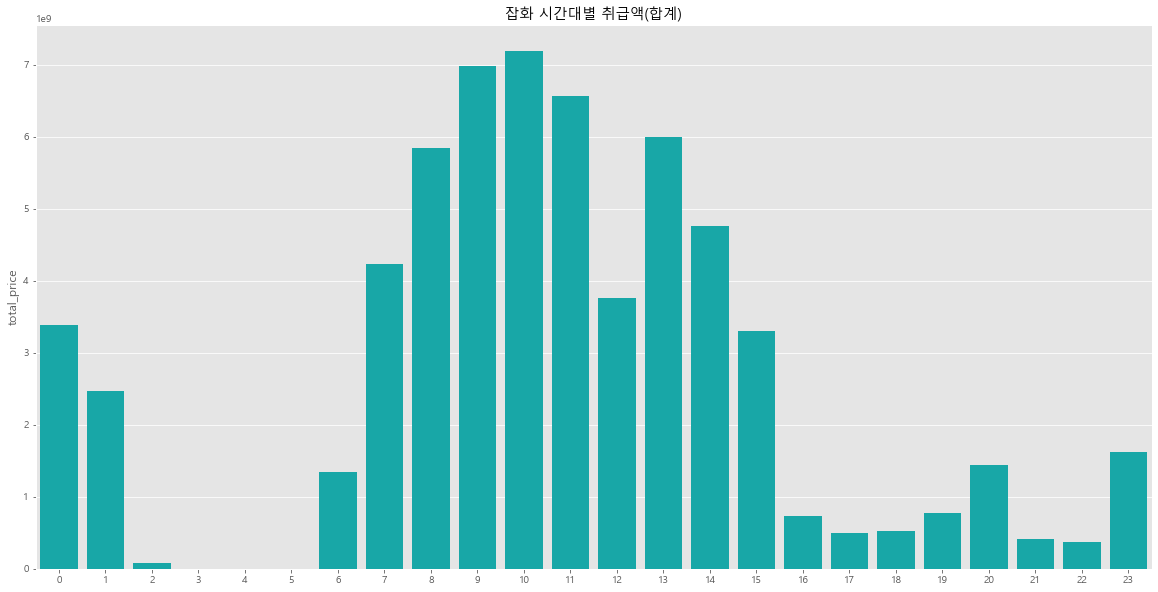

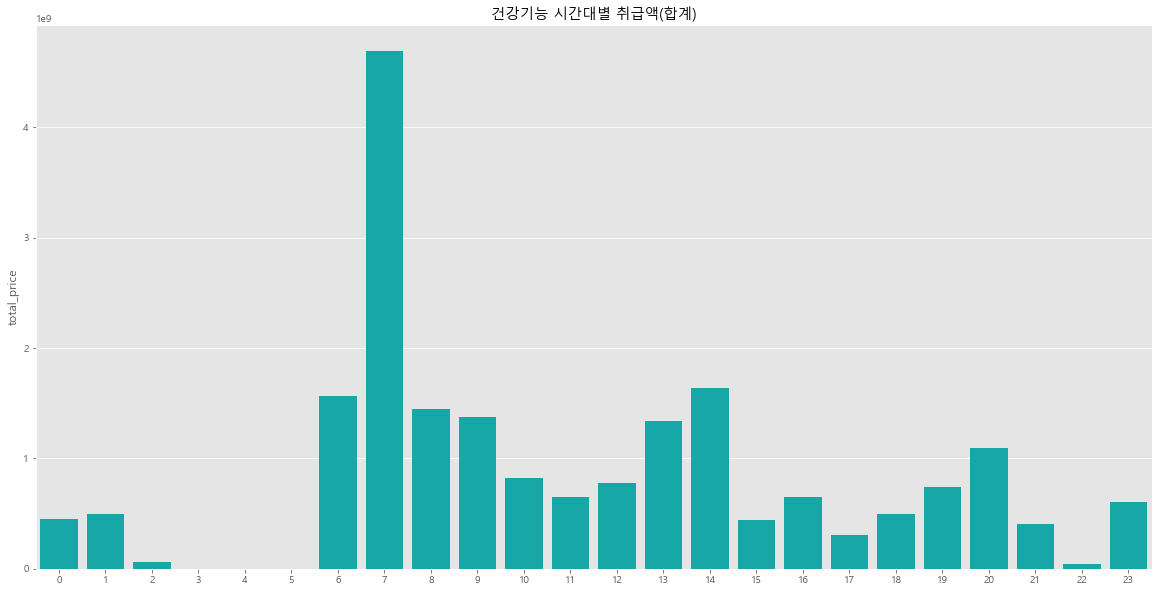

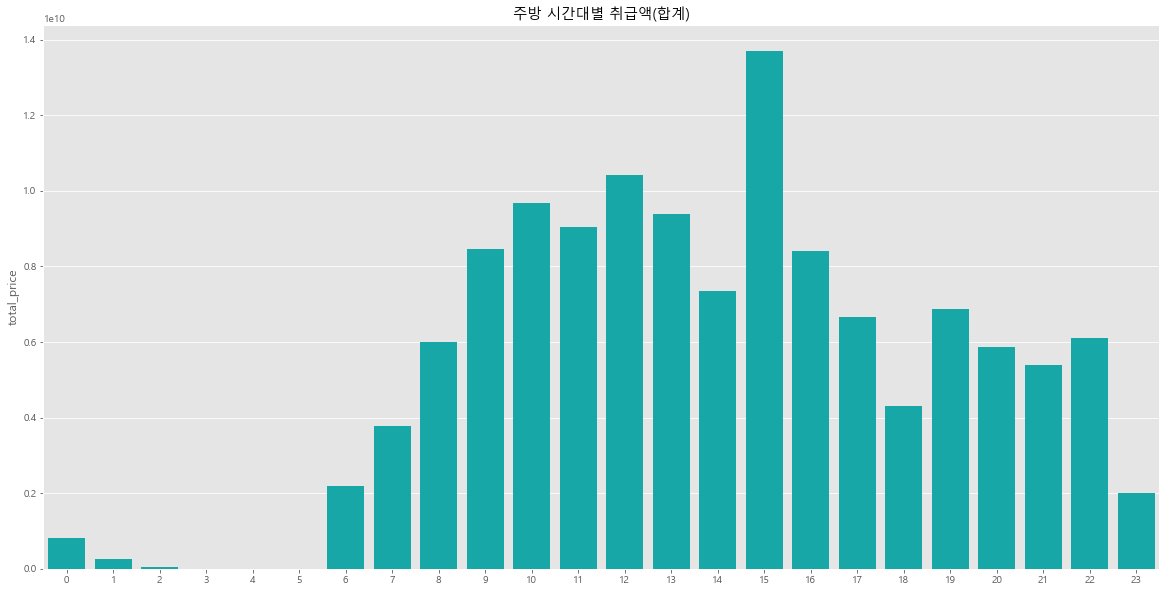

In [117]:
for i in p_group_name:
    hour_sum(i)

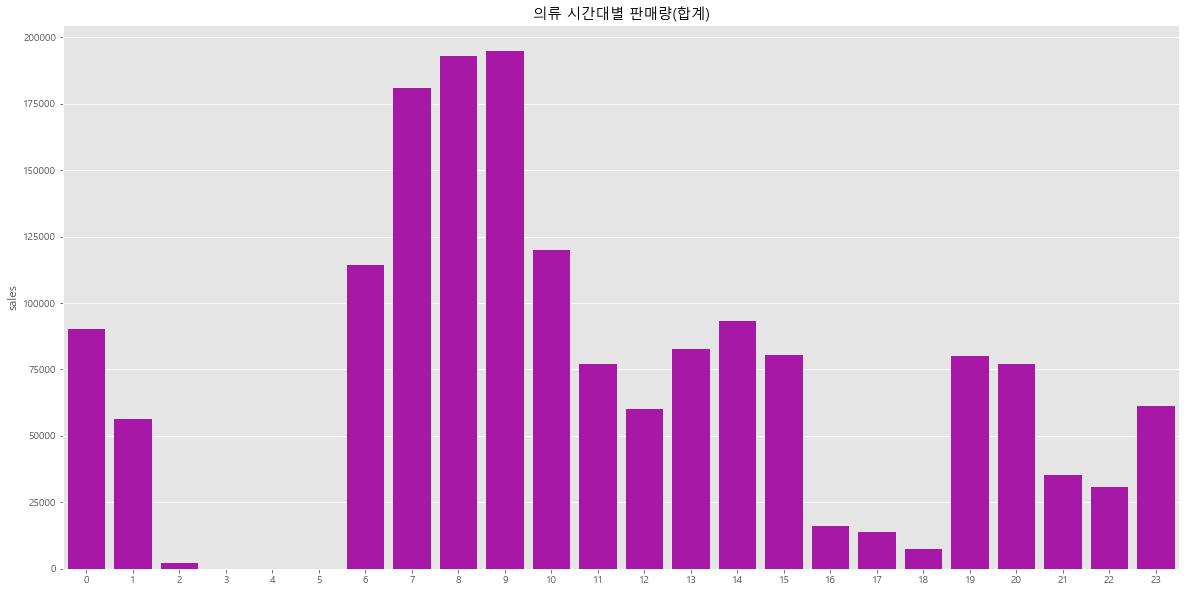

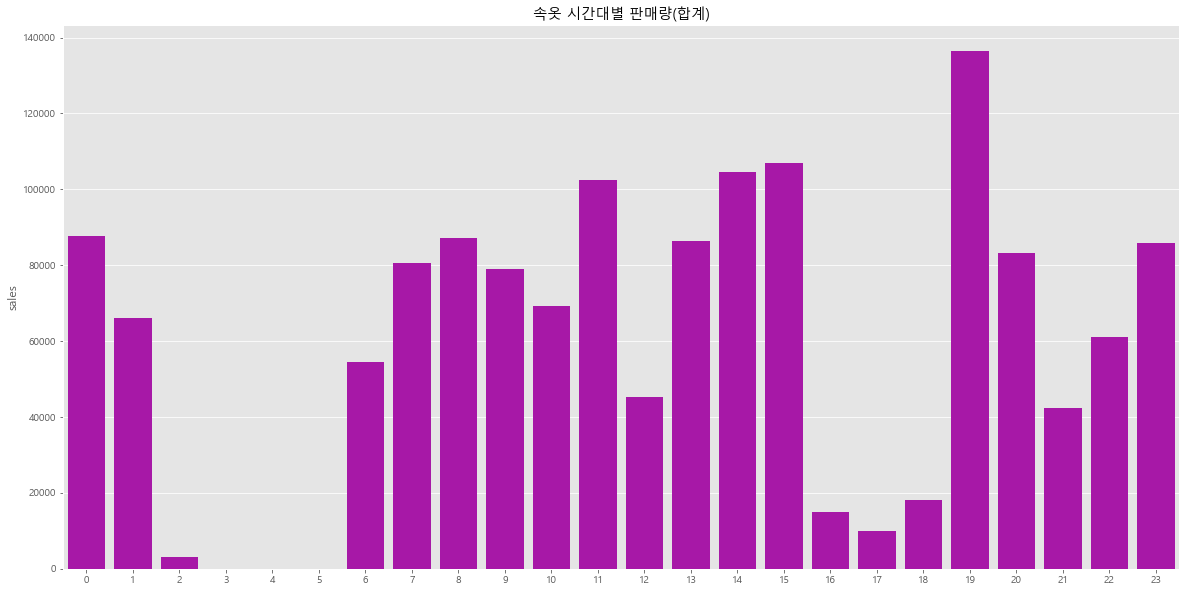

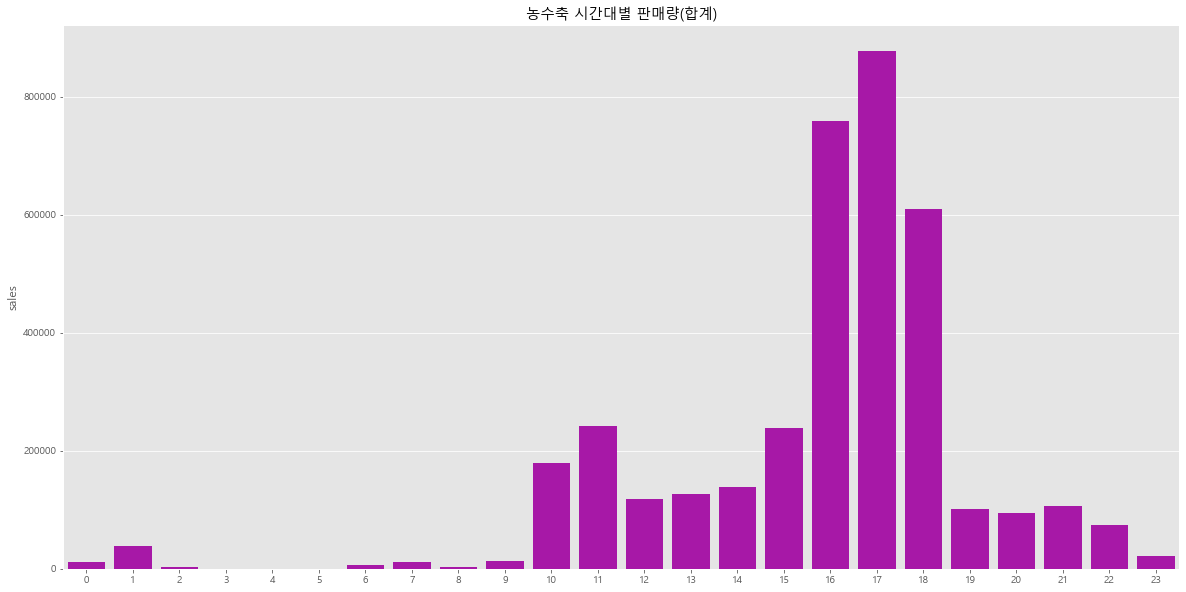

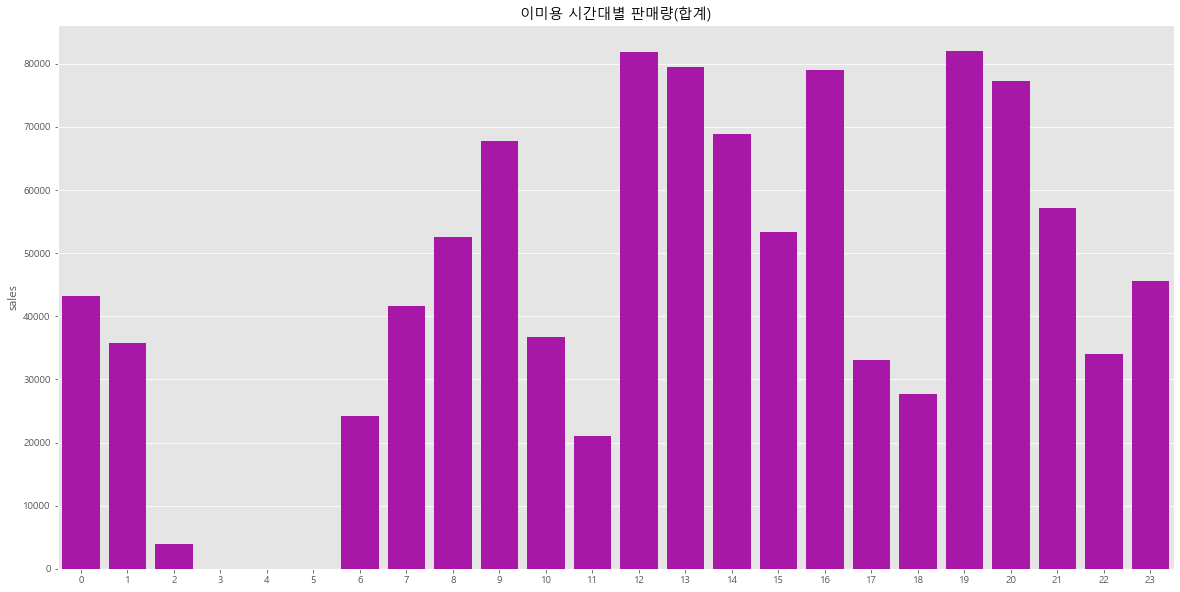

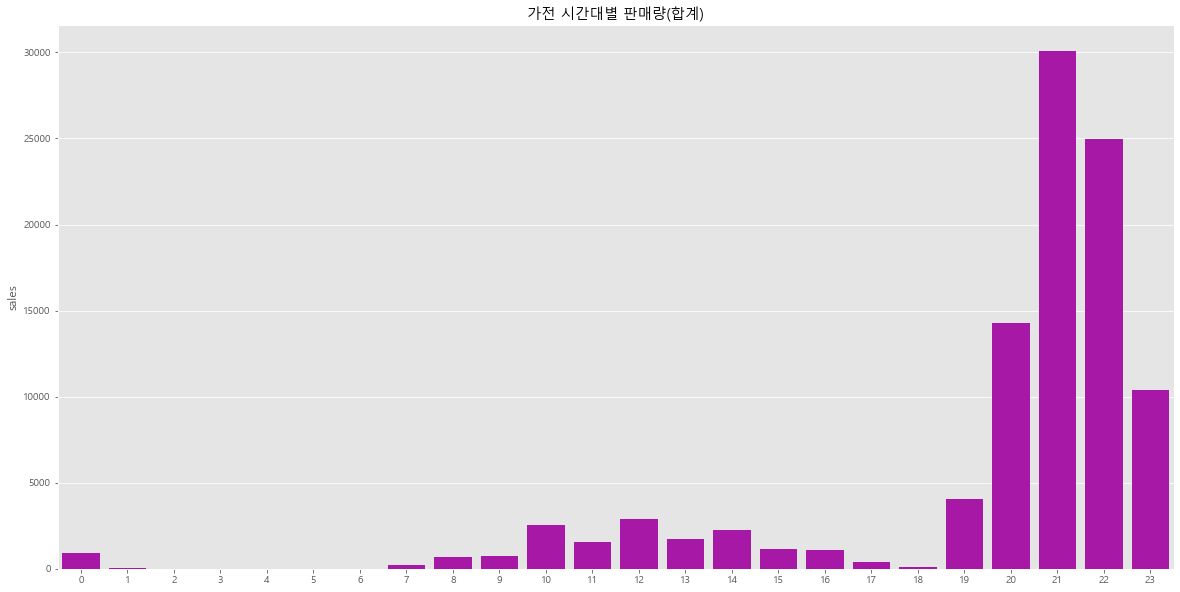

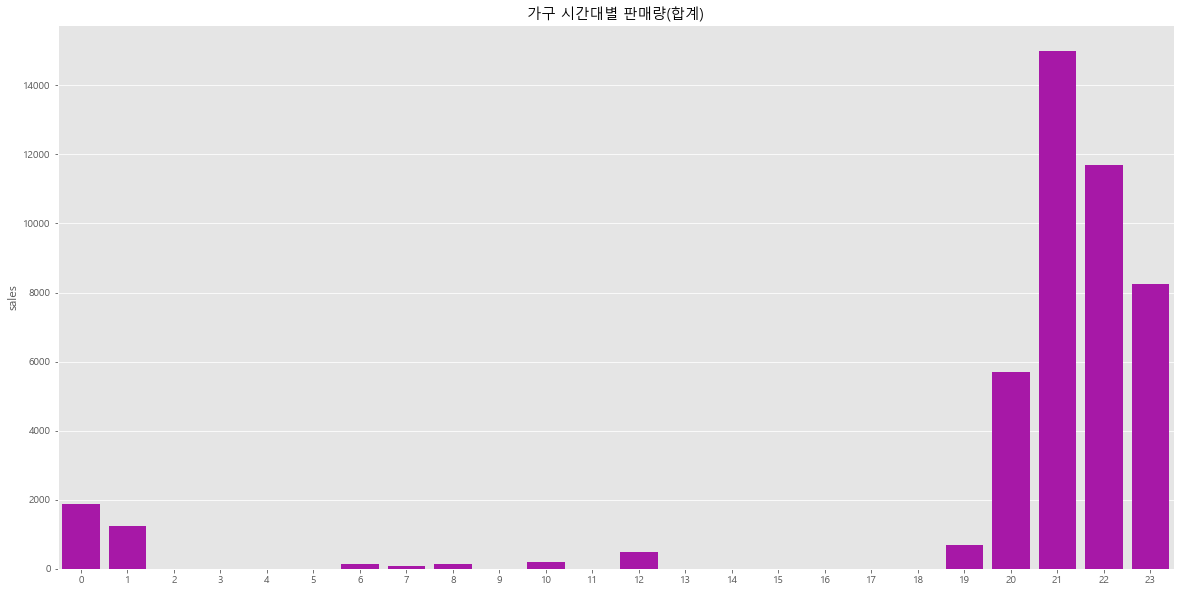

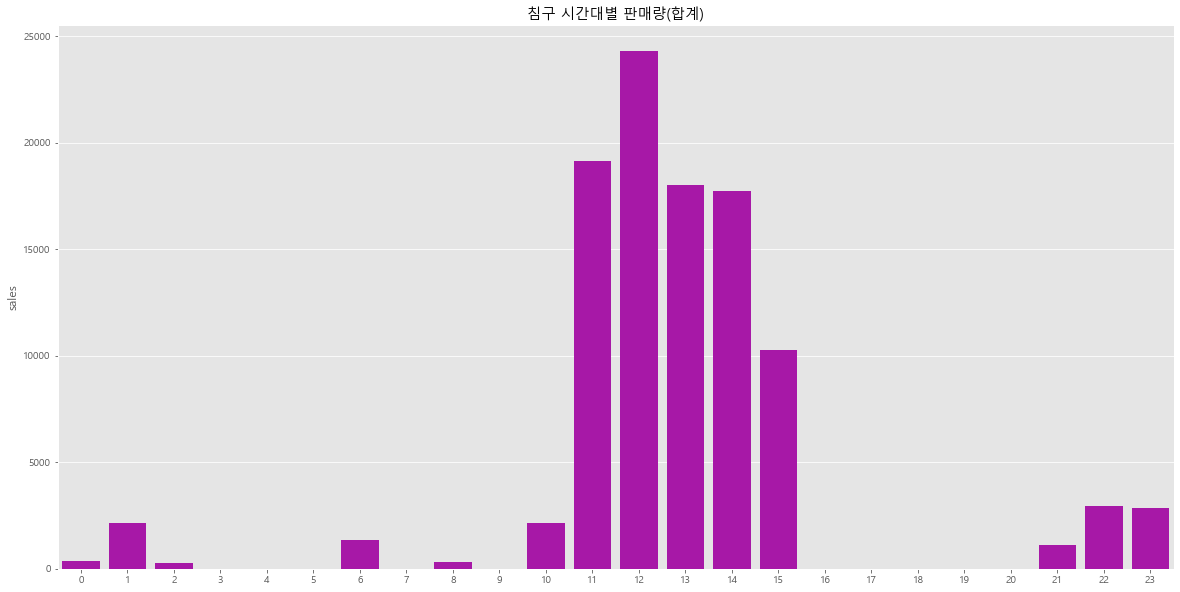

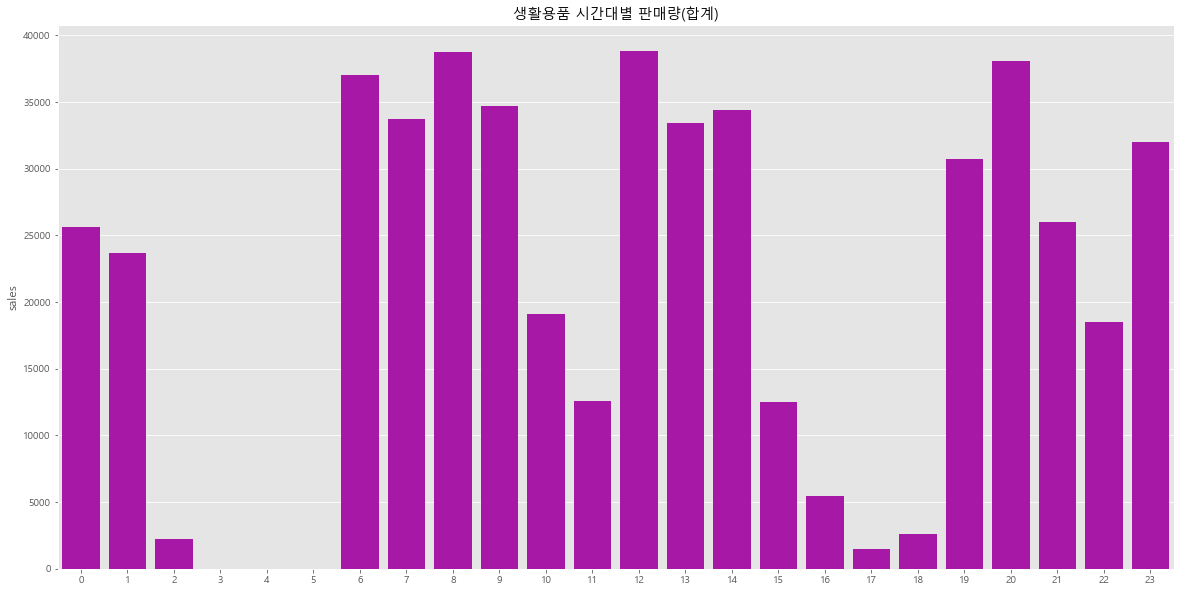

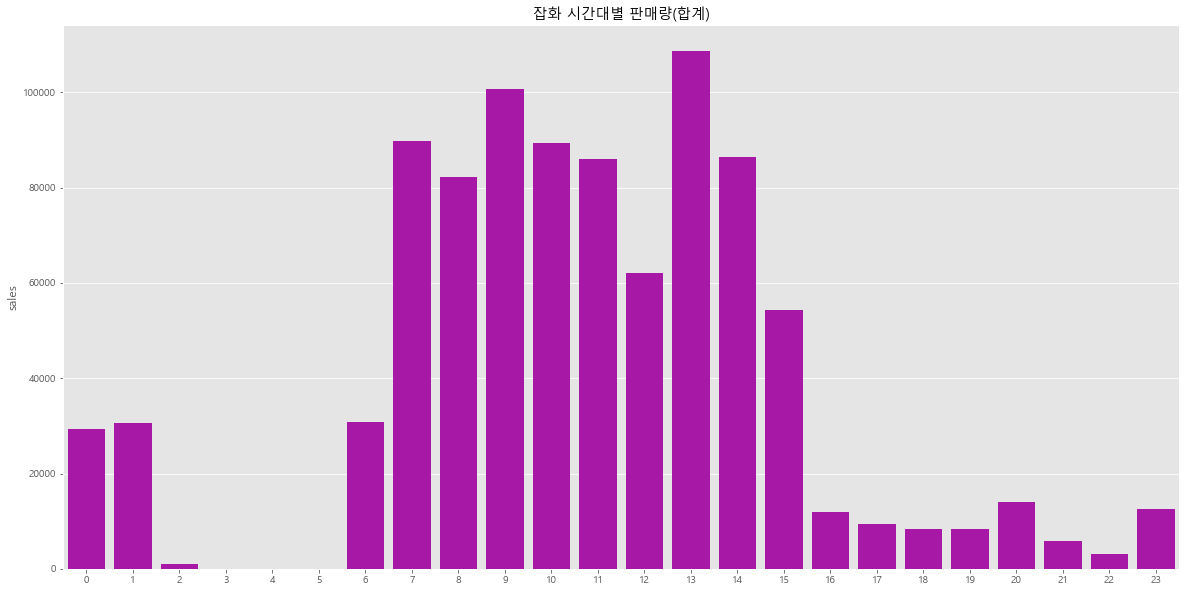

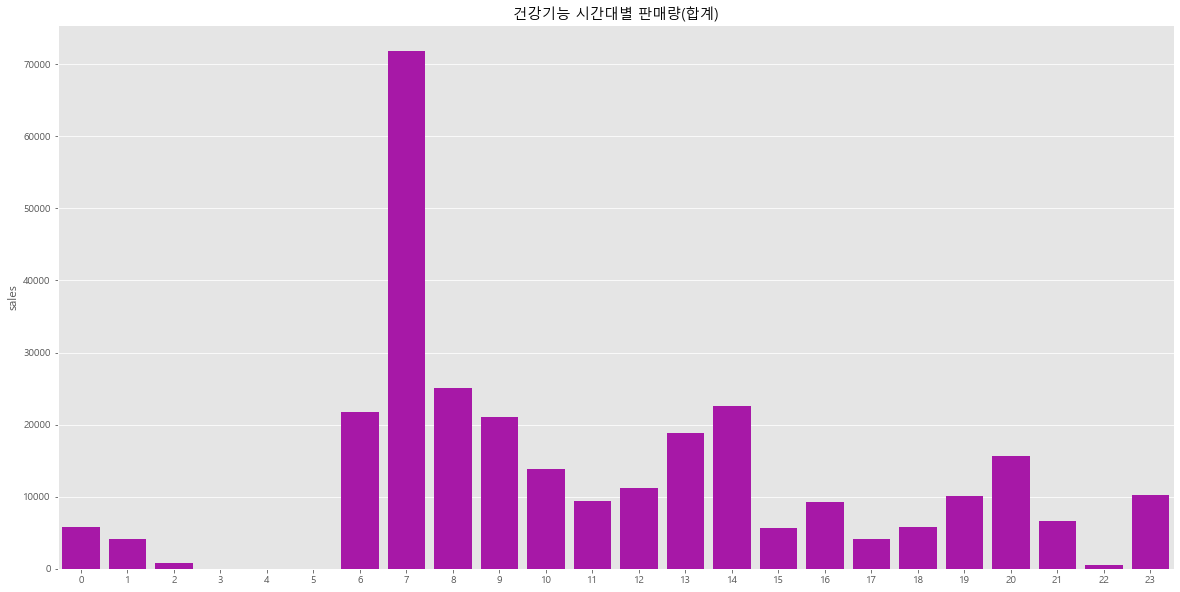

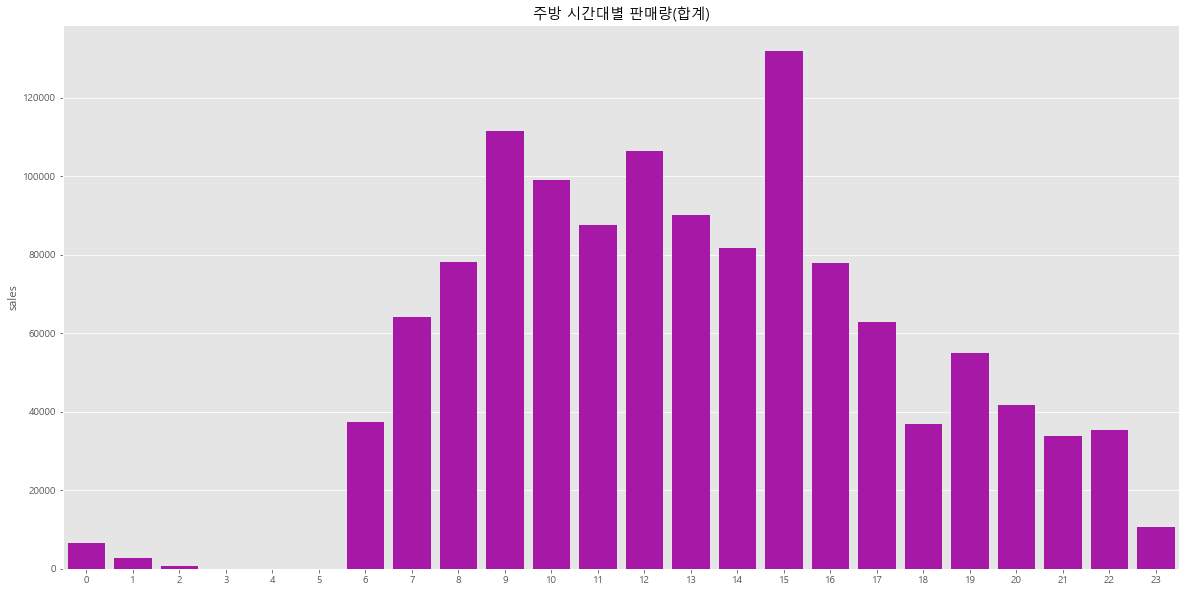

In [145]:
for i in p_group_name:
    hour_sum_sales(i)

In [162]:
# for i in p_group_name:
#     hour_mean(i)

In [163]:
# for i in p_group_name:
#     prime_mean(i)

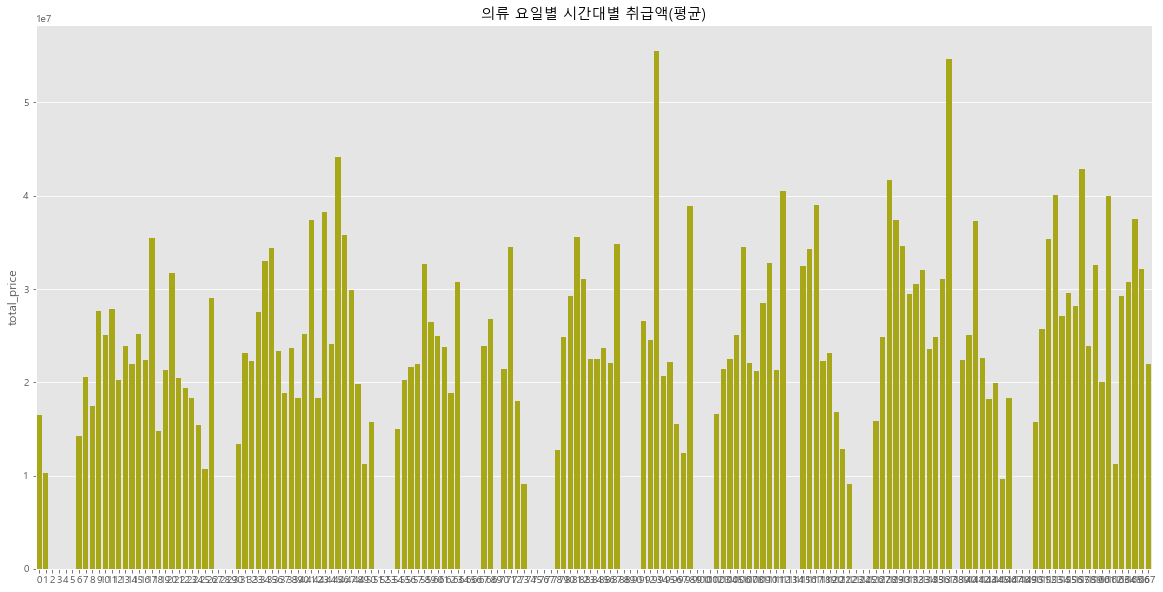

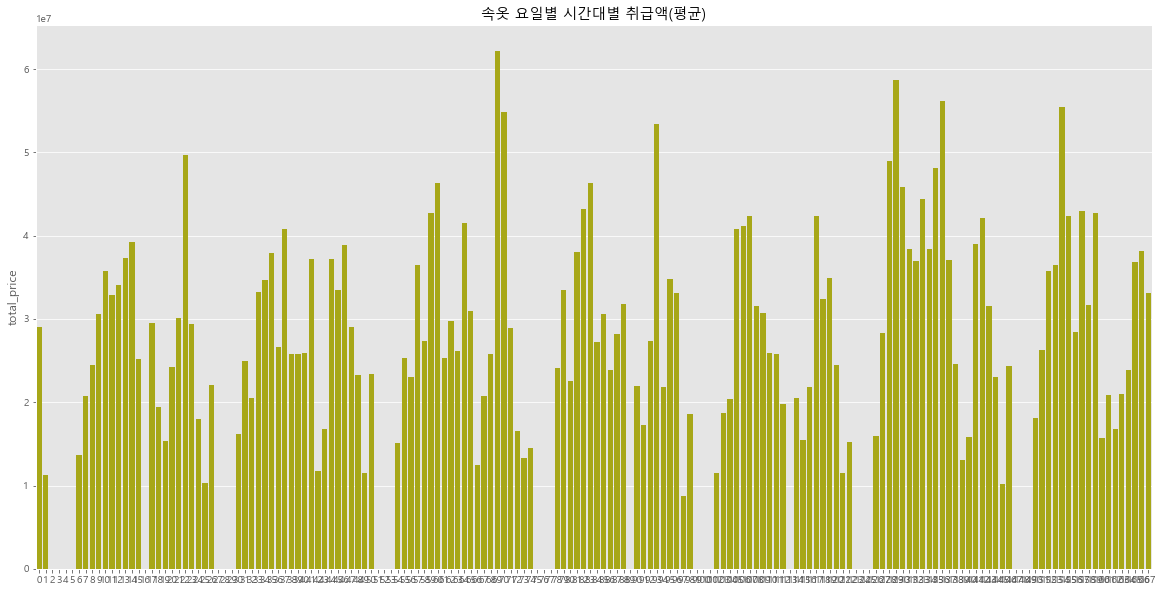

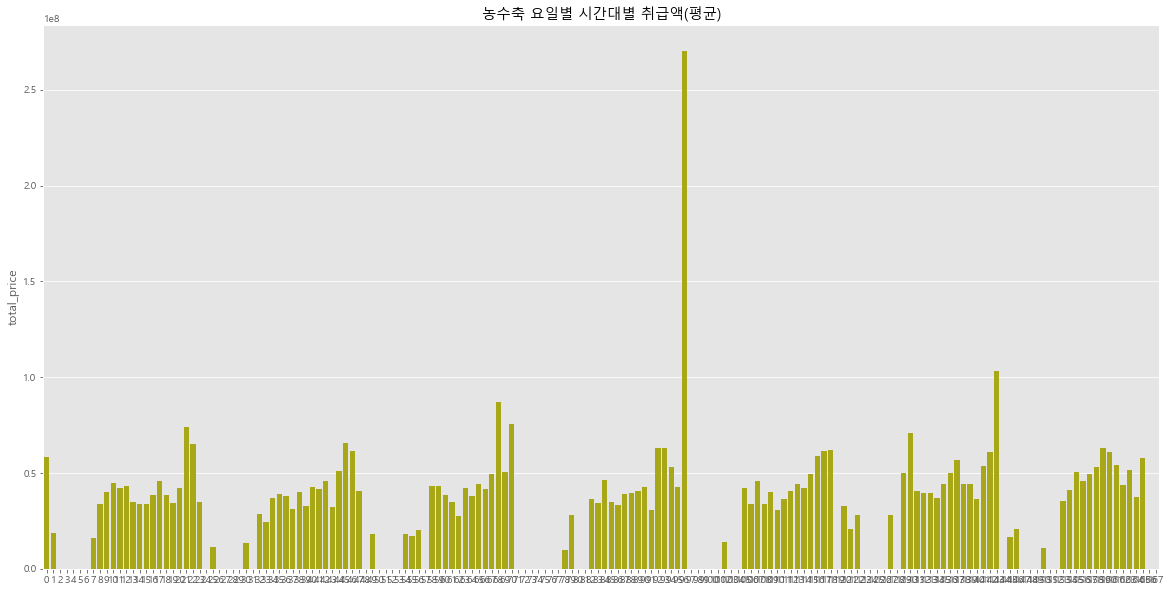

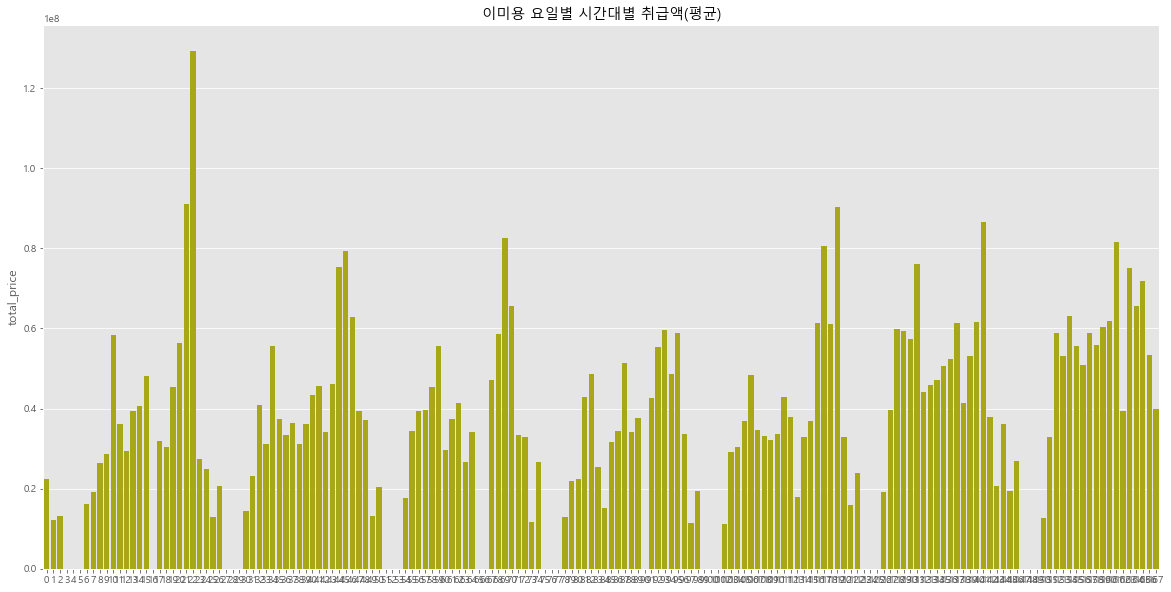

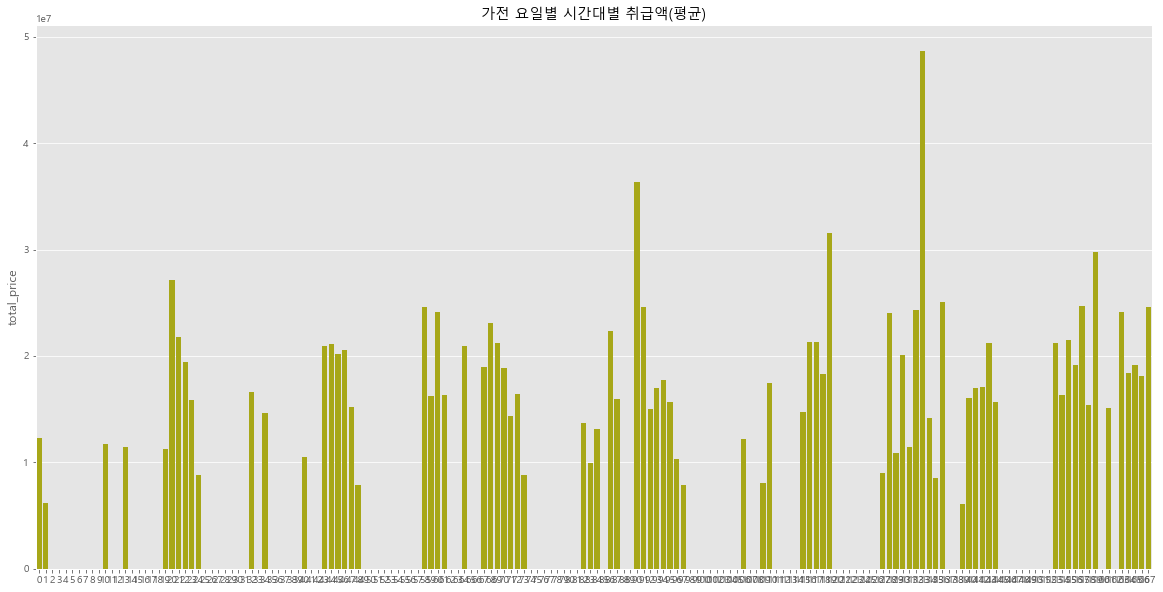

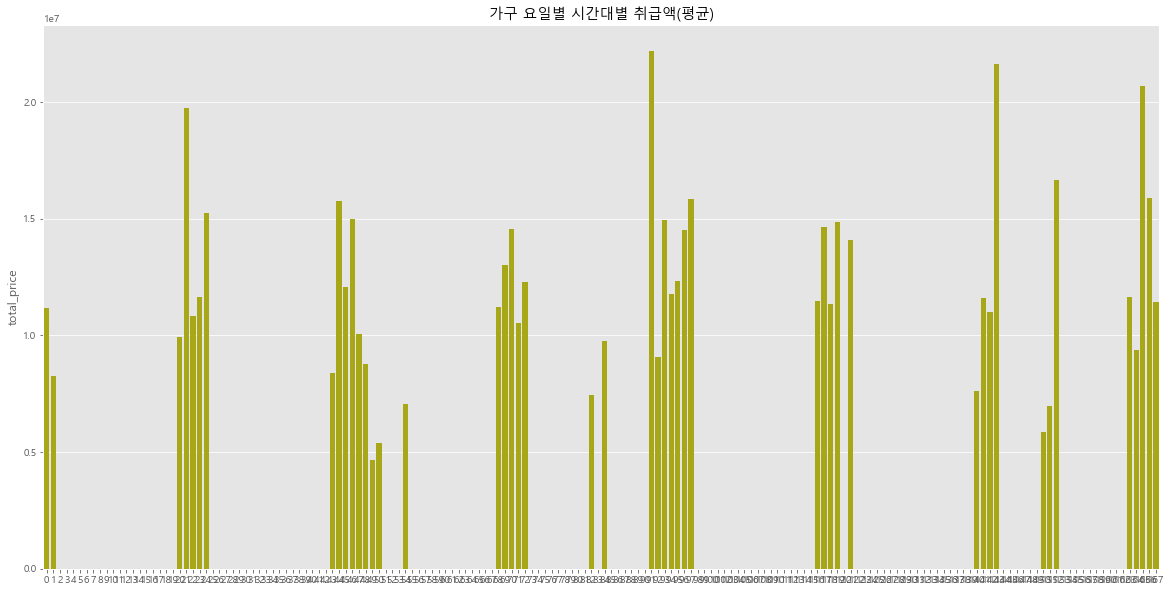

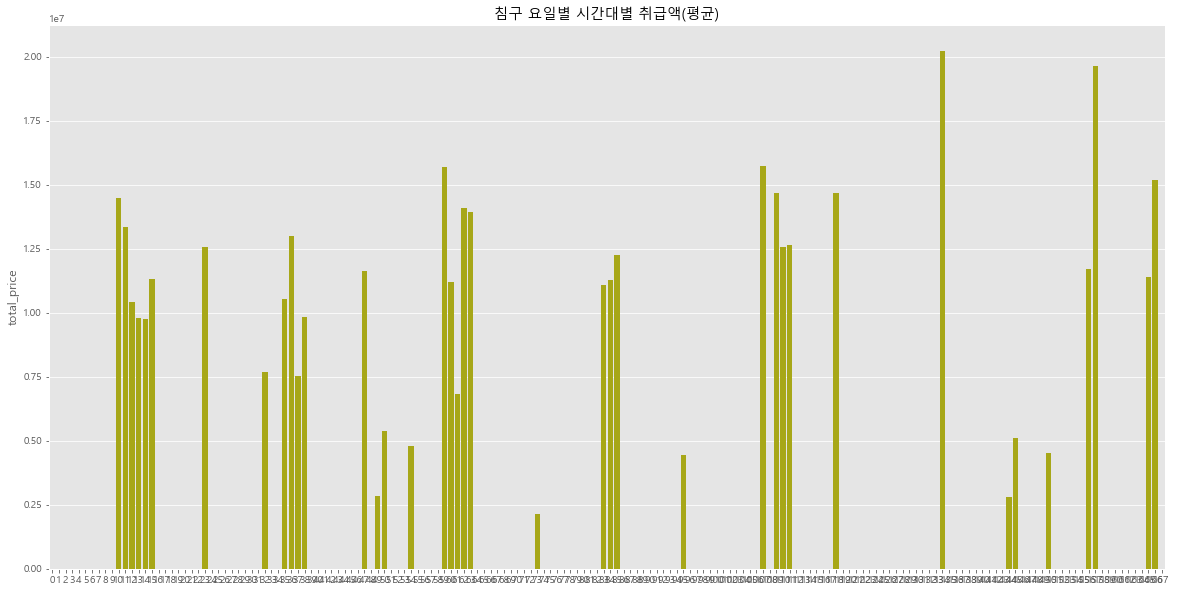

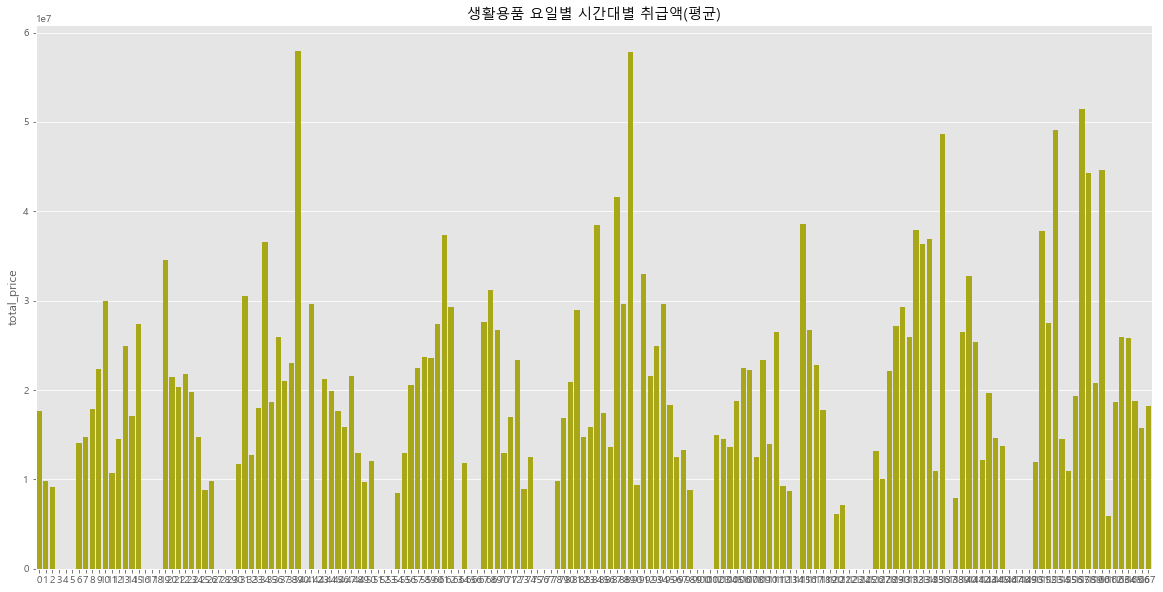

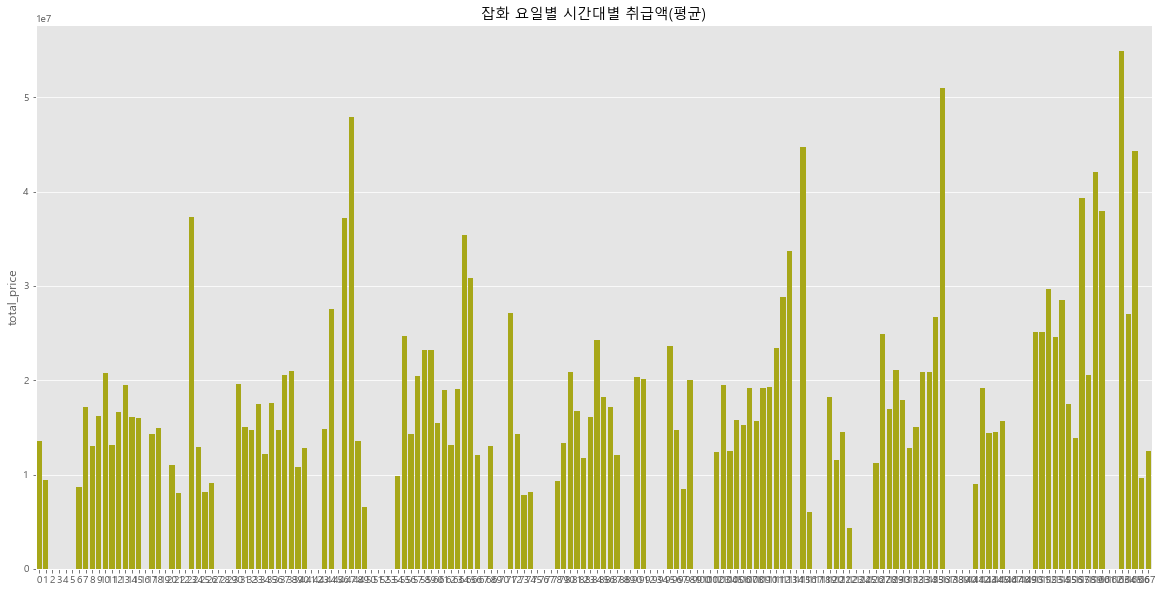

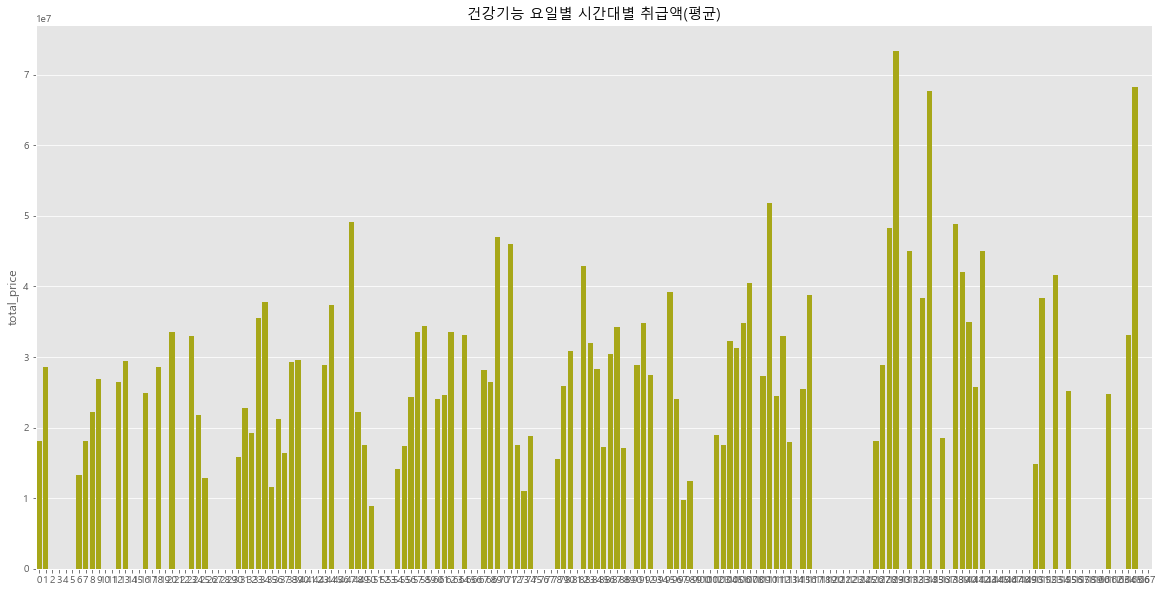

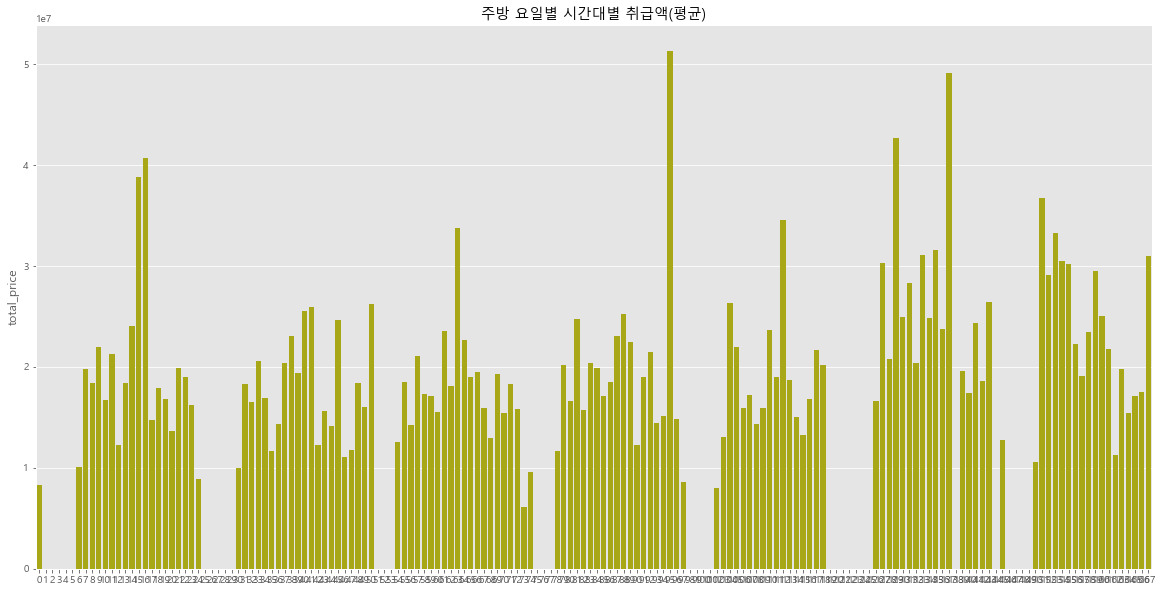

In [167]:
for i in p_group_name:
    prime_mean(i)